# MHD equilibria all the way to the separatrix 

## Model

Customarily, DESC represents flux surfaces with a Fourier-Zernike representation as a function of the flux coordinates $(\rho,\theta,\zeta)$, where $\rho$ is a flux surface label, $\zeta$ is a toroidal angle currently fixed to the toroidal angle $\phi$, and $\theta$ is an arbitrary poloidal angle. This representation works well under ordinary circumstances, though when it needs to represent surfaces with discontinuous first derivatives it performs poorly due to the need for high mode numbers and the Gibbs phenomenon. In order to circumvent this issue, we introduce an intermediate mapping to a system with sharp edges.

Let us define the problem as follows. First, we examine a surface with a rational rotational transform $\iota=N/M$, where $N$ must be an integer multiple of the number of field periods of the system, $N_{fp}$. For convenience, we define the **pre-domain** as the coordinates $(\rho,\alpha,\zeta)$, where $\alpha$ is a field line label. If visualized in a toroidal system, the LCFS in the pre-domain is a torus.

We then choose that this pre-domain maps to the **domain** $(\tilde\rho(\rho,\alpha),\tilde\alpha(\rho,\alpha),\zeta)$. The defining feature of this map is that its poloidal cross-sections are regular $N$-gons. In order to achieve this mapping, we make use of the hypergeometric function ${}_2F_1(a,b;c;d)$ which allows for the complex mapping from a unit disc to an arbitrary regular $N$-gon to be expressed as 
$$P^N(w)={}_2F_1(2/N,1/N;(N+1)/N; w^N)w,$$ 
where $w,z\in\mathbb{Z}$. 

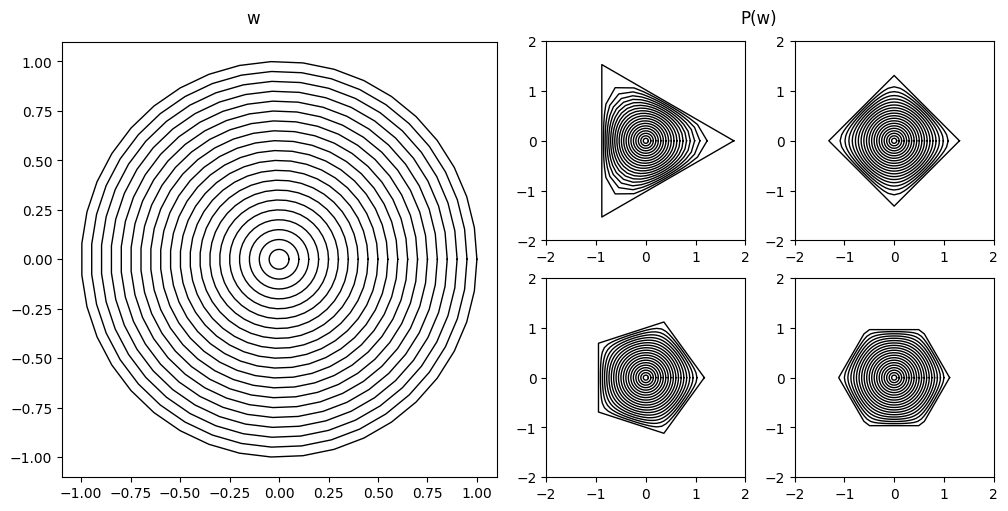

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import hyp2f1

e = np.e
π = np.pi

npolygons = 4
ncontours = 20
npts = 40

fig = plt.figure(figsize=(10, 5), constrained_layout=True)
subfigs = fig.subfigures(1, 2)

subfigs[0].suptitle("w")
ax = subfigs[0].subplots(1,1)

for i in range(ncontours):
    ρs = (i + 1) / ncontours
    ws = ρs * np.array([e ** (2j * π * i / (npts - 1)) for i in range(npts)])
    v = [w.imag for w in ws]
    u = [w.real for w in ws]
    ax.plot(u,v, color='k', lw=1)
    # ax.scatter(u, v, color='k', s=0.05)
ax.set_aspect('equal', adjustable='box')

subfigs[1].suptitle("P(w)")
axs = subfigs[1].subplots(2, 2) #, figsize=(8, 7)
axs = np.hstack(axs)

for k in range(npolygons):
    N = k + 3
    a = 2.0 / N
    b = 1.0 / N
    c = (N + 1.0) / N
    
    for i in range(ncontours):
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts - 1) for i in range(npts)])
        # θ = θ * 1.0 - 1 / N * np.sin(θ * N)
        # θ = θ - 1.75 / N**2 * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)

        zs = np.array([hyp2f1(a, b, c, w ** N) * w for w in ws])
        y = [z.imag for z in zs]
        x = [z.real for z in zs]

        axs[k].plot(x, y, color='k', lw=1)
        # axs[k].scatter(x, y, color='k', s=0.05)
        axs[k].set_aspect('equal', adjustable='box')
        axs[k].set_xlim((-2,2))
        axs[k].set_ylim((-2,2))
    
    npts = 101

More specifically, as we will later require the polygon to be inscribed within a unit disc, we introduce the normalized mapping 
$$\hat{P}_N(\rho,\alpha)=P_N(\rho,\alpha)/|P_N(1,0)|$$
and make the definitions that
$$\tilde\rho(\rho,\theta)=|\hat{P}_N(\rho,\alpha)|,$$
$$\tilde\alpha(\rho,\alpha)=\angle\hat{P}_N(\rho,\alpha).$$
Note that $(\rho,\alpha)=(1,2\pi n/N)$ corresponds to the $n\textrm{th}$ **pre-vertex** and $(\tilde\rho,\tilde\alpha)=(\tilde\rho(1,2\pi n/N),\tilde\alpha(1,2\pi n/N))$ to the $n\textrm{th}$ **vertex**.

The **range** is the final mapping from the domain to a Fourier-Zernike series,
$$R(\rho,\theta,\zeta)=\sum_{l,m,n}R_{lmn}\mathcal{R}_l^{|m|}(\tilde\rho(\rho,\alpha))\mathcal{F}^m(\tilde\theta(\rho,\alpha,\zeta))\mathcal{F}^n(\zeta),$$
where we introduce
$$\tilde\theta(\rho,\alpha,\zeta)\equiv\tilde\alpha(\rho,\alpha)+\iota(1)\zeta$$
to account for the fact that $\alpha$ is fixed to a field line and is therefore not a proper poloidal angle due to its lack of $N_{fp}$-symmetry.


We can use this to plot some basic examples:

In [1]:
from mayavi import mlab

mlab.show()

In [2]:
from desc.basis import FourierZernikeBasis
from mayavi import mlab
from scipy.special import hyp2f1
import numpy as np

π = np.pi
e = np.e

# returns ρ_tilde, θ_tilde as function of ρ, θ
def tilde(ρs, αs, Nsides):
    a = 2.0 / Nsides
    b = 1.0 / Nsides
    c = (Nsides + 1.0) / Nsides
    ρs, αs = map(lambda x: np.atleast_1d(np.asarray(x)), (ρs, αs))
    αs = αs - np.e ** (-(Nsides-3)/12) * np.sin(αs * Nsides) / Nsides
    ws = ρs * np.e ** (1j * αs)
    Ps = np.array([hyp2f1(a, b, c, w ** Nsides) * w for w in ws])
    P0s = np.array([hyp2f1(a, b, c, 1) for ρ in ρs])
    Phats = Ps / P0s
    ρ_tildes = np.abs(Phats)
    α_tildes = np.angle(Phats)
    α_tildes = np.where(α_tildes < 0, α_tildes + 2 * np.pi, α_tildes)
    return ρ_tildes, α_tildes

nθ, nζ = 100, 100

for Msides in [3, 4]:
    θ = np.array([2 * π * k / (nθ - 1) for k in range(nθ)])
    ζs = np.array([2 * π * k / (nζ - 1) for k in range(nζ)])
    θ, ζs = map(np.ravel, np.meshgrid(θ, ζs, indexing="ij"))
    ρs = np.ones_like(θ)
    ρs_tilde, θs_tilde = tilde(ρs, θ, Msides)
    for i in range(len(ζs)):
        θs_tilde[i] = θs_tilde[i] + ζs[i]
    nodes = np.array([ρs_tilde, θs_tilde, ζs]).T

    # create a shape where # z = ρ_tilde * sin(θ_tilde), r = 5 + ρ_tilde * cos(θ_tilde)
    L, M, N = 2, 2, 2
    basis = FourierZernikeBasis(L, M, N)
    basis_vecs = basis.evaluate(nodes)
    num_coeffs = np.shape(basis_vecs)[1]
    z_coeffs = np.zeros(num_coeffs)
    r_coeffs = np.zeros(num_coeffs)
    z_coeffs[basis.get_idx(1, -1, 0)] = 1
    r_coeffs[basis.get_idx(0, 0, 0)] = 5
    r_coeffs[basis.get_idx(1, 1, 0)] = 1

    Rs = basis_vecs @ r_coeffs
    Zs = basis_vecs @ z_coeffs
    Xs = Rs * np.cos(nodes[:, 2])
    Ys = Rs * np.sin(nodes[:, 2])

    Xs = np.reshape(Xs, (nθ, nζ))
    Ys = np.reshape(Ys, (nθ, nζ))
    Zs = np.reshape(Zs, (nθ, nζ))

    mlab.mesh(Xs, Ys, Zs, color=(1,1,1))
    mlab.title(f"M={Msides}")
    mlab.show()

    nθ += 1

TraitError: Cannot set the undefined 'copy_global_ids' attribute of a 'PointData' object.

### Modifying the poloidal angle to account for collocation nodes

One issue to consider is the fact that an evenly spaced grid in $\alpha$ may still lead to an uneven grid in $\tilde\alpha(\rho, \alpha)$ as $d\tilde\alpha/d\alpha\neq 1$. This can be seen below in the fact that uniformly spaced lines in the $w$-plane create non-uniform and curved lines in the $P(w)$ plots.

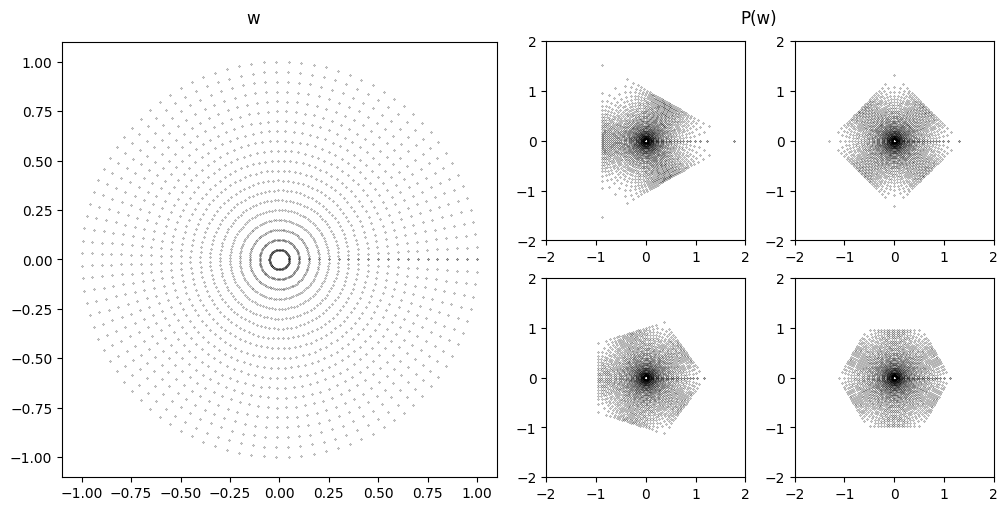

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import hyp2f1

e = np.e
π = np.pi

npolygons = 4
ncontours = 20
npts = 100

fig = plt.figure(figsize=(10, 5), constrained_layout=True)
subfigs = fig.subfigures(1, 2)

subfigs[0].suptitle("w")
ax = subfigs[0].subplots(1,1)

for i in range(ncontours):
    ρs = (i + 1) / ncontours
    ws = ρs * np.array([e ** (2j * π * i / (npts - 1)) for i in range(npts)])
    v = [w.imag for w in ws]
    u = [w.real for w in ws]
    ax.scatter(u, v, color='k', s=0.05)
ax.set_aspect('equal', adjustable='box')

subfigs[1].suptitle("P(w)")
axs = subfigs[1].subplots(2, 2) #, figsize=(8, 7)
axs = np.hstack(axs)

for k in range(npolygons):
    N = k + 3
    a = 2.0 / N
    b = 1.0 / N
    c = (N + 1.0) / N
    
    for i in range(ncontours):
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts - 1) for i in range(npts)])
        # θ = θ * 1.0 - 1 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)

        zs = np.array([hyp2f1(a, b, c, w ** N) * w for w in ws])
        y = [z.imag for z in zs]
        x = [z.real for z in zs]

        axs[k].scatter(x, y, color='k', s=0.05)
        axs[k].set_aspect('equal', adjustable='box')
        axs[k].set_xlim((-2,2))
        axs[k].set_ylim((-2,2))
    
    npts = 101

In order to circumvent this issue, we will let $\alpha\rightarrow g(\alpha)$. In order to choose $g$, note that our goal is to ensure that $\tilde\alpha(\rho, g(\alpha))\approx \alpha$, and hence that $g\approx \tilde\alpha^{-1}$. As $\tilde\alpha(\rho, \alpha)$ is sparse at $\alpha=2\pi n/N$ and dense elsewhere, we would therefore want $g(\alpha)$ to be dense at these points and sparse elsewhere. As the density of points is proportional to $1/(dg/d\alpha)$, we would like $dg/d\alpha\approx 0$ near $2\pi n/N$ and $dg/d\alpha > 0$ elsewhere. The simplest solution that satisfies this condition is 
$$\frac{dg}{d\alpha}=1-\cos(N\alpha),$$
which implies that
$$g(\alpha)=\alpha-\frac{\sin(N\alpha)}{N}.$$
Letting $\alpha\rightarrow g(\alpha)$, we indeed see that the grid points become much more evenly spaced.

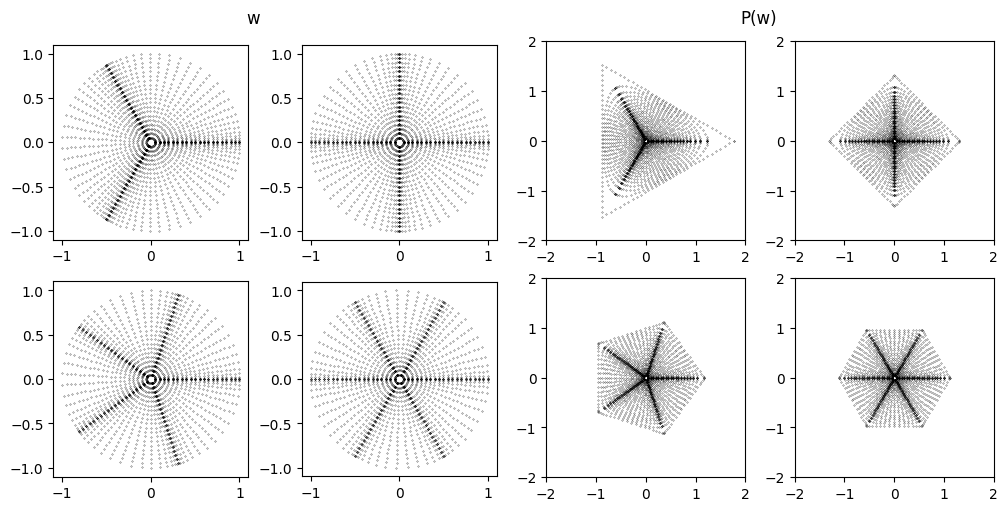

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import hyp2f1

e = np.e
π = np.pi

npolygons = 4
ncontours = 20
npts = 100

fig = plt.figure(figsize=(10, 5), constrained_layout=True)
subfigs = fig.subfigures(1, 2)

subfigs[0].suptitle("w")
axs = subfigs[0].subplots(2,2)
axs = np.hstack(axs)

for k in range(npolygons):
    ax = axs[k]
    N = k + 3
    for i in range(ncontours):
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts - 1) for i in range(npts)])
        θ = θ * 1.0 - 1 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)
        v = [w.imag for w in ws]
        u = [w.real for w in ws]
        ax.scatter(u, v, color='k', s=0.05)
        ax.set_aspect('equal', adjustable='box')

subfigs[1].suptitle("P(w)")
axs = subfigs[1].subplots(2, 2) #, figsize=(8, 7)
axs = np.hstack(axs)

for k in range(npolygons):
    N = k + 3
    a = 2.0 / N
    b = 1.0 / N
    c = (N + 1.0) / N
    
    for i in range(ncontours):
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts - 1) for i in range(npts)])
        θ = θ * 1.0 - 1 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)

        zs = np.array([hyp2f1(a, b, c, w ** N) * w for w in ws])
        y = [z.imag for z in zs]
        x = [z.real for z in zs]

        axs[k].scatter(x, y, color='k', s=0.05)
        axs[k].set_aspect('equal', adjustable='box')
        axs[k].set_xlim((-2,2))
        axs[k].set_ylim((-2,2))
    
    npts = 101

However, we can see that the collocation points now tend to bunch up closely around the line connecting the origin to the corners, which makes solving on the grid less efficient. Moreover, there still remain two other issues: the derivative of $g(\alpha)$ is not analytic as going from $\rho=\epsilon\rightarrow -\epsilon$ causes a flip, and the Jacobian would have singularities as there are places where the derivative is zero. To solve all these issues, we modify $g(\alpha)$ to read
$$g(\rho,\alpha)=\alpha - \frac{\rho^a\sin(N\alpha)}{N},$$
where $a$ is some large number. This allows for a smooth interpolation between the new map and the original case and also ensures analyticity. 

To demonstrate that this works, we can see case of $a=4$ below.

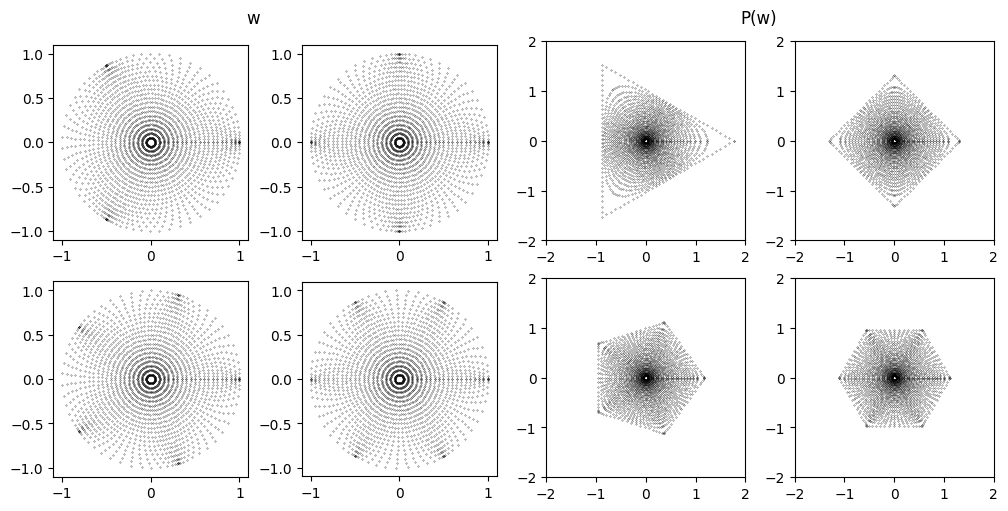

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import hyp2f1

e = np.e
π = np.pi

npolygons = 4
ncontours = 20
npts = 100

fig = plt.figure(figsize=(10, 5), constrained_layout=True)
subfigs = fig.subfigures(1, 2)

subfigs[0].suptitle("w")
axs = subfigs[0].subplots(2,2)
axs = np.hstack(axs)

for k in range(npolygons):
    ax = axs[k]
    N = k + 3
    for i in range(ncontours):
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts - 1) for i in range(npts)])
        θ = θ * 1.0 - ρs ** 4 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)
        v = [w.imag for w in ws]
        u = [w.real for w in ws]
        ax.scatter(u, v, color='k', s=0.05)
        ax.set_aspect('equal', adjustable='box')

subfigs[1].suptitle("P(w)")
axs = subfigs[1].subplots(2, 2) #, figsize=(8, 7)
axs = np.hstack(axs)

for k in range(npolygons):
    N = k + 3
    a = 2.0 / N
    b = 1.0 / N
    c = (N + 1.0) / N
    
    for i in range(ncontours):
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts - 1) for i in range(npts)])
        θ = θ * 1.0 - ρs ** 4 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)

        zs = np.array([hyp2f1(a, b, c, w ** N) * w for w in ws])
        y = [z.imag for z in zs]
        x = [z.real for z in zs]

        axs[k].scatter(x, y, color='k', s=0.05)
        axs[k].set_aspect('equal', adjustable='box')
        axs[k].set_xlim((-2,2))
        axs[k].set_ylim((-2,2))
    
    npts = 101

One final issue is that for the cases N>4 the collocation points still tend to bunch up near the corners. This can be alleviated by introducing a multiplicative factor $\delta<1$ in front of the sinusoid in the above equation. From some basic numerical fitting, it appears that a reasonable form for this value is $\delta_N=e^{-(N-3)/12}$. This yields the more accurate
$$g(\rho,\alpha)=\alpha - \frac{\rho^ae^{-(N-3)/12}\sin(N\alpha)}{N}.$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import hyp2f1

e = np.e
π = np.pi

npolygons = 4
ncontours = 20
npts = 100

fig = plt.figure(figsize=(10, 5), constrained_layout=True)
subfigs = fig.subfigures(1, 2)

subfigs[0].suptitle("w")
axs = subfigs[0].subplots(2,2)
axs = np.hstack(axs)

for k in range(npolygons):
    ax = axs[k]
    N = k + 3
    for i in range(ncontours):
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts - 1) for i in range(npts)])
        θ = θ * 1.0 - e ** (-(N-3)/12) * ρs ** 4 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)
        v = [w.imag for w in ws]
        u = [w.real for w in ws]
        ax.scatter(u, v, color='k', s=0.05)
        ax.set_aspect('equal', adjustable='box')

subfigs[1].suptitle("P(w)")
axs = subfigs[1].subplots(2, 2) #, figsize=(8, 7)
axs = np.hstack(axs)

for k in range(npolygons):
    N = k + 3
    a = 2.0 / N
    b = 1.0 / N
    c = (N + 1.0) / N
    
    for i in range(ncontours):
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts - 1) for i in range(npts)])
        θ = θ * 1.0 - e ** (-(N-3)/12) * ρs ** 4 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)

        zs = np.array([hyp2f1(a, b, c, w ** N) * w for w in ws])
        y = [z.imag for z in zs]
        x = [z.real for z in zs]

        axs[k].scatter(x, y, color='k', s=0.05)
        axs[k].set_aspect('equal', adjustable='box')
        axs[k].set_xlim((-2,2))
        axs[k].set_ylim((-2,2))
    
    npts = 101

The final issue that remains is that there is a higher density of collocation points near the center of the polygons. To get around this, we simply scale the number of collocations points with the $\rho$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import hyp2f1

e = np.e
π = np.pi

npolygons = 4
ncontours = 20
npts_max = 45

fig = plt.figure(figsize=(10, 5), constrained_layout=True)
subfigs = fig.subfigures(1, 2)

subfigs[0].suptitle("w")
axs = subfigs[0].subplots(2,2)
axs = np.hstack(axs)

for k in range(npolygons):
    ax = axs[k]
    N = k + 3
    for i in range(ncontours):
        npts = N + int(np.ceil(N * 10 * i / (ncontours-1)))
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts) for i in range(npts)])
        θ = θ * 1.0 - e ** (-(N-3)/12) * ρs ** 4 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)
        v = [w.imag for w in ws]
        u = [w.real for w in ws]
        ax.scatter(u, v, color='k', s=0.05)
        ax.set_aspect('equal', adjustable='box')

subfigs[1].suptitle("P(w)")
axs = subfigs[1].subplots(2, 2) #, figsize=(8, 7)
axs = np.hstack(axs)

for k in range(npolygons):
    N = k + 3
    a = 2.0 / N
    b = 1.0 / N
    c = (N + 1.0) / N
    
    for i in range(ncontours):
        npts = N + int(np.ceil(N * 10 * i / (ncontours-1)))
        ρs = (i + 1) / ncontours
        θ = np.array([2 * π * i / (npts) for i in range(npts)])
        θ = θ * 1.0 - e ** (-(N-3)/12) * ρs ** 4 / N * np.sin(θ * N)
        ws = ρs * e ** (1j * θ)

        zs = np.array([hyp2f1(a, b, c, w ** N) * w for w in ws])
        y = [z.imag for z in zs]
        x = [z.real for z in zs]

        axs[k].scatter(x, y, color='k', s=0.05)
        axs[k].set_aspect('equal', adjustable='box')
        axs[k].set_xlim((-2,2))
        axs[k].set_ylim((-2,2))
    
    npts_max = 41

## Matching pre-existing separatrices

In order to demonstrate the completeness of our model, first we will use it to match pre-existing separatrices such as that of the W7-X stellarator. To do so, there is one (and optionally a second) set of boundary conditions we must apply to our Fourier-Zernike series. Primarily, we stipulate that the series must match our LCFS at the boundary, which we can represent as
$$\sum_{l,m,n}R_{lmn}\mathcal{R}_l^{|m|}(\tilde\rho(1,g(1, \alpha)))\mathcal{F}^m(\tilde\theta(1, g(1, \alpha),\zeta))\mathcal{F}^n(\zeta)=R^\textrm{LCFS}(\alpha,\zeta).$$
Note that because $\alpha$ is constrained to multiples of $2\pi/N$ at the x-lines, the x-lines are fixed to the corners of the polygonal map simply by virtue of the field line coordinate. That being said, $\alpha$ is free to vary at all places besides the corners, so for convenience I choose to define the field line coordinate of a point on the LCFS as 
$$\alpha=\frac{2\pi}{N}\left[n+\frac{d_n(\mathbf{x})}{d_n(\mathbf{x})+d_{n+1}(\mathbf{x})}\right],$$
where $d_n(\mathbf{x})$ is the distance between the point $x$ and the $n\textrm{th}$ x-line at their mutual value of $\zeta$. 

Optionally, we can also choose for the series to match the magnetic axis at $\rho=0$, which we represent as
$$R(0,\alpha, \zeta)=\sum_{l,n}R_{l0n}\mathcal{R}_l^{0}(0)\mathcal{F}^n(\zeta)=\sum_{l\textrm{ even},n}R_{l0n}(-1)^{l/2}\mathcal{F}^n(\zeta)=R^{\textrm{MA}}(\zeta).$$

### X-lines

Let's go ahead and calculate the X-points at $\zeta=0$. To do so, we will solve the system of equations
$$f(R)-R=0,$$
$$f(Z)-Z=0,$$
where $(R, Z)$ are the coordinates from which a field line is launched at $\zeta=0$ and $f(R), f(Z)$ are the Poincaré maps after one full toroidal transit $\zeta=2\pi$. As this code takes some time to execute, the results are shown below:

1. (R, Z) = (5.701400157514465, 1.4871761297485879e-06)
2. (R, Z) = (5.453448682852216, 0.877797352929447)
3. (R, Z) = (5.453448177043237, -0.8777955473029323)
4. (R, Z) = (6.03759010371004, 0.6135406555844469)
5. (R, Z) = (6.037627333357124, -0.6134992009462005)

In [ ]:
# import numpy as np
# from desc.backend import jnp
# from desc.magnetic_fields import field_line_integrate
# from scipy.optimize import root
# from tools import get_w7x_coils_desc
# from desc.derivatives import Derivative

# def residual(x, coils):
#     """This function returns the point (R1, Z1) of a particle after one toroidal
#     transit that was launched from (R0, Z0)."""
#     R0, Z0 = x[0], x[1]
#     phis = jnp.array([0, 2 * np.pi])

#     Rs, Zs = field_line_integrate(
#         r0=[R0],
#         z0=[Z0],
#         phis=phis,
#         field=coils,
#         source_grid=None
#         )
    
#     R1, Z1 = Rs[-1, 0], Zs[-1, 0]
#     return jnp.array([R1-R0, Z1-Z0])

# jac = Derivative(residual, mode="rev")
    
# desc_coils = get_w7x_coils_desc()
# # guesses for each of the 5 x-points at φ=0
# x_guesses = [[5.70, 0.00],
#              [5.45, 0.88], 
#              [5.45, -0.88], 
#              [6.03, 0.61], 
#              [6.03, -0.61]]
# for x_guess in x_guesses:
#     x0 = root(residual, x_guess, (desc_coils,), jac=jac, tol=1e-12).x
#     R0, Z0 = x0[0], x0[1]
#     Δ = residual(x0, desc_coils)
#     print(f"R_guess={x_guess[0]}, Z_guess={x_guess[1]}; R={R0}, Z={Z0}, ΔR={Δ[0]}, ΔZ={Δ[1]}")

# # this prints:
# # R_guess=5.45, Z_guess=0.88; R=5.453448682852216, Z=0.877797352929447, ΔR=2.4437252221787276e-10, ΔZ=1.6050032136671888e-07
# # R_guess=5.45, Z_guess=-0.88, R=5.453448177043237, Z=-0.8777955473029323, ΔR=2.2019097656311715e-10, ΔZ=-2.9322725358937873e-09
# # R_guess=5.7013995, Z_guess=0; R=5.7014001593106345, Z=3.8104984918294895e-06, ΔR=-8.669243101167012e-11, ΔZ=1.4830155172601665e-08
# # R_guess=6.0375, Z_guess=0.6131; R=6.03759010371004, Z=0.6135406555844469, ΔR=1.838539098741876e-09, ΔZ=5.936506799808505e-06
# # R_guess=6.0375, Z_guess=-0.6131; R=6.037627333357124, Z=-0.6134992009462005, ΔR=1.0406860262435202e-08, ΔZ=1.2457027837697865e-05

Let's go ahead and plot these on the $\zeta=0$ Poincaré section. This takes a while so the code below is commented out and the result shown as a screenshot.

In [ ]:
# %matplotlib inline

# import desc
# import matplotlib.pyplot as plt
# import numpy as np
# from desc.grid import LinearGrid
# from desc.plotting import poincare_plot
# from IPython.display import set_matplotlib_formats
# from tools import get_w7x_coils_desc

# plt.ioff() # for well-behaving plots
# set_matplotlib_formats('svg')

# eq = desc.examples.get("W7-X")
# desc_coils = get_w7x_coils_desc()

# grid_trace = LinearGrid(rho=np.linspace(0.03, 1.005, 8, endpoint=True))
# r0 = eq.compute("R", grid=grid_trace)["R"]
# z0 = eq.compute("Z", grid=grid_trace)["Z"]
# fig, ax = poincare_plot(desc_coils, r0, z0, ntransit=1500, NFP=5, phi=2, size=2, color='k')

# grid_trace = LinearGrid(rho=1.1375, theta=[0, 1])
# r0 = eq.compute("R", grid=grid_trace)["R"]
# z0 = eq.compute("Z", grid=grid_trace)["Z"]
# fig, ax = poincare_plot(desc_coils, r0, z0, ntransit=1500, NFP=5, phi=2, size=2, color='k', ax=ax)
# x_pts = [[5.453448682852216, 0.877797352929447],
#             [5.453448177043237, -0.8777955473029323],
#             [5.7014001593106345, 3.8104984918294895e-06],
#             [6.03759010371004, 0.6135406555844469],
#             [6.037627333357124, -0.6134992009462005]]
# for x_pt in x_pts:
#     ax[0,0].scatter(x_pt[0], x_pt[1], c='red', marker='d', s=12)
# ax[0, 1].remove()
# ax[0, 0].set_xlim(4.4, 6.4)
# fig


<img src="./output/poincare_w_xpoints.svg" width="500" align="center">

The x-lines are then calculated by performing field line tracing on the x-points. As the results take time to compute, we instead comment out the code and show screenshots below.

In [ ]:
# import desc
# import numpy as np
# from desc.plotting import poincare_plot
# from mayavi import mlab
# from tools import *

# mlab.figure()

# x, y, z = get_x_lines()
# for i in range(len(x)):
#     mlab.plot3d(x[i], y[i], z[i], color=(1, 0, 0), tube_radius=0.0075)

# # plot poincare maps
# NFP = 5
# N_xsections = 6
# desc_coils = get_w7x_coils_desc()
# phi = np.linspace(0, np.pi, N_xsections, endpoint=False)
# phi = np.linspace(0, 2*np.pi/NFP, N_xsections, endpoint=False)
# eq = desc.examples.get("W7-X") 
# grid_traces = [LinearGrid(rho=np.linspace(0.03, 1.005, 8, endpoint=True)), 
#                LinearGrid(rho=1.1375, theta=[0, 1])]
# for grid_trace in grid_traces:
#     r0 = eq.compute("R", grid=grid_trace)["R"]
#     z0 = eq.compute("Z", grid=grid_trace)["Z"]
#     fig, ax, data = poincare_plot(desc_coils, r0, z0, ntransit=400, NFP=NFP, phi=phi, size=2, color='k', return_data=True);
#     for i in range(N_xsections):
#         rs = data["R"][:, i, :]
#         zs = data["Z"][:, i, :]
#         p = phi[i]
#         if i % 2 == 1: p = p + 2 * np.pi / NFP
#         xs = rs * np.cos(p)
#         ys = rs * np.sin(p)
#         mlab.points3d(xs, ys, zs, scale_factor=0.02, color=(0, 0, 0))

# # Create planes on which to show Poincaré maps
# r, z = [4, 7], [-1.5, 1.5]
# R, Z = np.meshgrid(r, z)
# for i in range(N_xsections):
#     p = phi[i]
#     if i % 2 == 1: p = p + 2 * np.pi / NFP
#     X = R * np.cos(p)
#     Y = R * np.sin(p)
#     mlab.mesh(X, Y, Z, color=(1, 1, 1), opacity=0.9)

# mlab.show()

<img src="./output/3dpoincare_01.png" width="500" align="center">\
<img src="./output/3dpoincare_02.png" width="500" align="center">\
<img src="./output/3dpoincare_03.png" width="500" align="center">

### Separatrix

There are a number of plausible ways to generate points on a separatrix from magnetic field data. 

The first—and originally tried method—is to perform a QFM optimization. Our idea was to describe the surface between two adjacent x-lines as a Fourier-Chebyshev series, fix the edges of the surface to the x-lines using boundary conditions, then minimize the flux through the surface by varying the spectral coefficients. Unfortunately, this functioned quite poorly, even when the initial conditions were good. What I believe is the reason for this is that the Fourier representation of the x-lines isn't very accurate to a reasonable order of modes—the x-lines are of one field period while the separatrix is of five field periods, so the x-lines need about five times as many coefficients to achieve a similar resolution—which meant that the "x-lines" ended up dramatically crossing flux surfaces and preventing a QFM optimization from functioning.

The next method employed was to generate a grid of points using field line tracing, where the starting point was taken to be a distance $\epsilon$ away from the x-point in a random direction. This luckily worked for us, but has the strong potential to be finnicky.

The final method—and likely most principled—is to calculate the stable and unstable manifolds for a fixed point. (For a non-chaotic separatrix, the stable and unstable should give the exact same result). To do so, we note that the $n\textrm{th}$ Poincaré map $f^n$ can be linearized in the vicinity of a fixed point as
$$\bf{f}^n(\mathbf{x}+\delta\mathbf{x})\approx \bf{f}^n(\mathbf{x})+M^n\delta \mathbf{x},$$
where $M^n_{ij}=\partial_jf_i^n$ is the Jacobian matrix and indices $i,j$ run over the dimensions $R$ and $Z$. Note further than the eigenvalues of $M$ must be positive and have the property that one is less than one and the other is greater than one. If $\delta\bf{x}$ is proportional to one of the eigenvectors, this implies that the one with a smaller eigenvector maps towards the fixed point, while the one with a larger eigenvector maps away from the fixed point. For this reason, the larger eigenvalue and its eigenvector are referred to as unstable, while the smaller eigenvalue and its eigenvector are referred to as stable. It is from these that define the stable/unstable manifolds as all trajectories that approach/leave a fixed point. We calculate these in the method of (Smiet et al., 2025) by writing the linearized mapping for the unstable and stable cases as
$$f^n(\mathbf{x}^\times+\epsilon\mathbf{v}_1)\approx f^n(\mathbf{x}^\times)+\lambda_1\epsilon \mathbf{v}_1,$$
$$f^{-n}(\mathbf{x}^\times+\epsilon\mathbf{v}_2)\approx f^{-n}(\mathbf{x}^\times)+\lambda_2^{-1}\epsilon \mathbf{v}_2,$$
where we apply the backwards map for the stable case because it can be shown $M^{-n}=(M^n)^{-1}$ with the implication that $(M^n)^{-1}\mathbf{v}_2=\lambda_2^{-1}\mathbf{v}_2$. Then, for small values of $\epsilon$ we generate an array of values near the x-point that lie on the manifold. For each of these values, we then perform several Poincaré mappings, yielding a large number of values on the manifold. 

The code used to calculate the separatrix in this manner was split up into a couple pieces. First, we generate the data and export as JSONs. The code to do so is commented out below. (In particular, this code generates a "separatrix_plotting.json" with high density of points poloidally and low density toroidally, and a "separatrix_fitting.json" with a moderate density points poloidally and toroidally).

In [ ]:
# import desc
# import numpy as np
# from desc.backend import jnp
# from desc.derivatives import Derivative
# from desc.magnetic_fields import field_line_integrate
# from desc.plotting import poincare_plot
# from tools import *

# # poincare map and its jacobian
# def poincare_map(x, coils):
#     """This function returns the point (R1, Z1) of a particle after one toroidal
#     transit that was launched from (R0, Z0)."""
#     R0, Z0 = x[0], x[1]
#     phis = jnp.array([0, 2 * np.pi])
#     Rs, Zs = field_line_integrate([R0], [Z0], phis, coils)
#     R1, Z1 = Rs[-1, 0], Zs[-1, 0]
#     return jnp.array([R1, Z1])
# jac = Derivative(poincare_map, mode="rev")

# # basic details about the configuration
# eq = desc.examples.get("W7-X")
# NFP, M = 5, 5 # number field periods, number islands
# coils, backward_coils = get_w7x_coils_desc(), get_w7x_coils_desc()
# for coil in backward_coils: coil.Y_n = coil.Y_n.at[:].multiply(-1)

# # let's get some eigenvalues/vectors at an xpt
# x_point = [5.701400157514465, 1.4871761297485879e-06]
# jac_mat = jac(x_point, coils)
# eigenvals, eigenvecs = np.linalg.eig(jac_mat)

# idx_stable = np.where(eigenvals < 1)[0][0]
# idx_unstab = np.where(eigenvals > 1)[0][0]
# eigenval_stable = eigenvals[idx_stable]
# eigenval_unstab = eigenvals[idx_unstab]
# eigenvec_stable = eigenvecs[:, idx_stable]
# eigenvec_unstab = eigenvecs[:, idx_unstab]

# #50, 6 for plotting
# for n_starting_pts, nphis, name in zip([40, 50], [100, 6], ["fitting", "plotting"]):
#     # Generate the starting points for the unstable manifold
#     ε = 1e-5 
#     starting_pts = x_point + np.outer(np.linspace(0, ε, n_starting_pts), eigenvec_unstab)
#     r0s, z0s = starting_pts[:, 0], starting_pts[:, 1]

#     # perform the field line tracing on starting points
#     phi = np.linspace(0, 2*np.pi/NFP, nphis, endpoint=False)
#     ntransits_manifold_perisland = 15 
#     ntransits_manifold = ntransits_manifold_perisland * M
#     _, _, data = poincare_plot(coils, r0s, z0s, ntransits_manifold, phi, NFP, return_data=True);
#     rs, zs = data["R"], data["Z"] # index 0 = transit #, 1 = phi, 2 = starting pts

#     # reshape the data so index 0 = xpt #, 1 = phi, 2 = all others
#     new_shape = (M, ntransits_manifold_perisland, nphis, n_starting_pts)
#     rs, zs = map(lambda x: np.reshape(x, new_shape, order="F"), (rs, zs))
#     rs, zs = map(lambda x: np.swapaxes(x, 1, 2), (rs, zs))
#     new_shape = (M, nphis, n_starting_pts * ntransits_manifold_perisland)
#     rs, zs = map(lambda x: np.reshape(x, new_shape), (rs, zs))
#     rs[:, 0], zs[:, 0] = map(lambda x: np.roll(x[:, 0], -1, axis=0), (rs, zs))

#     # calculate thetas for the data
#     alphas = np.zeros_like(rs)
#     phis = np.zeros_like(rs)
#     for m in range(M):
#         for i in range(nphis):
#             Δr0 = rs[m, i, :] - rs[m - 1, i, 0]
#             Δz0 = zs[m, i, :] - zs[m - 1, i, 0]
#             Δr1 = rs[m, i, :] - rs[m, i, 0]
#             Δz1 = zs[m, i, :] - zs[m, i, 0]
#             d0 = np.sqrt(Δr0**2 + Δz0**2)
#             d1 = np.sqrt(Δr1**2 + Δz1**2)
#             alphas[m, i, :] = 2 * np.pi * (M - m - 1 + d1 / (d0 + d1)) / M
#             phis[m, i, :] = phi[i]

#     alphas_unstab = alphas.flatten()
#     phis_unstab = phis.flatten()
#     rs_unstab = rs.flatten()
#     zs_unstab = zs.flatten()

#     # Generate the starting points for the stable manifold
#     starting_pts = x_point + np.outer(np.linspace(0, ε, n_starting_pts), eigenval_stable)
#     r0s, z0s = starting_pts[:, 0], starting_pts[:, 1]

#     # perform the field line tracing on starting points
#     _, _, data = poincare_plot(backward_coils, r0s, z0s, ntransits_manifold, phi, NFP, return_data=True);
#     rs, zs = data["R"], data["Z"] # index 0 = transit #, 1 = phi, 2 = starting pts

#     # reshape the data so index 0 = xpt #, 1 = phi, 2 = all others
#     new_shape = (M, ntransits_manifold_perisland, nphis, n_starting_pts)
#     rs, zs = map(lambda x: np.reshape(x, new_shape, order="F"), (rs, zs))
#     rs, zs = map(lambda x: np.swapaxes(x, 1, 2), (rs, zs))
#     new_shape = (M, nphis, n_starting_pts * ntransits_manifold_perisland)
#     rs, zs = map(lambda x: np.reshape(x, new_shape), (rs, zs))
#     rs, zs = map(lambda x: np.flip(x, axis=1), (rs, zs))
#     rs, zs = map(lambda x: np.flip(x, axis=0), (rs, zs))
#     rs, zs = map(lambda x: np.flip(x, axis=2), (rs, zs))
#     rs, zs = map(lambda x: np.roll(x, 1, axis=1), (rs, zs))
#     rs, zs = map(lambda x: np.roll(x, 1, axis=0), (rs, zs))

#     # calculate thetas for the data
#     alphas = np.zeros_like(rs)
#     phis = np.zeros_like(rs)
#     thetas = np.zeros_like(rs)
#     for m in range(M):
#         for i in range(nphis):
#             Δr0 = rs[m, i, :] - rs[m, i, -1]
#             Δz0 = zs[m, i, :] - zs[m, i, -1]
#             Δr1 = rs[m, i, :] - rs[(m + 1) % M, i, -1]
#             Δz1 = zs[m, i, :] - zs[(m + 1) % M, i, -1]
#             d0 = np.sqrt(Δr0**2 + Δz0**2)
#             d1 = np.sqrt(Δr1**2 + Δz1**2)
#             alphas[m, i, :] = 2 * np.pi * (M - m - 1 + d1 / (d0 + d1)) / M
#             phis[m, i, :] = phi[i]

#     alphas_stable = alphas.flatten()
#     phis_stable = phis.flatten()
#     rs_stable = rs.flatten()
#     zs_stable = zs.flatten()

#     alphas = np.concatenate([alphas_unstab, alphas_stable])
#     phis = np.concatenate([phis_unstab, phis_stable])
#     rs = np.concatenate([rs_unstab, rs_stable])
#     zs = np.concatenate([zs_unstab, zs_stable])

#     results = {
#             "alphas": alphas.tolist(),
#             "phis":   phis.tolist(),
#             "rs":     rs.tolist(),
#             "zs":     zs.tolist()
#         }

#     import json
#     with open(f"separatrix_{name}.json", "w") as outfile:
#         json.dump(results , outfile, indent=2)

Next, we demonstrate the results on top of Poincaré plots. For speed, this code was also commented out and the results replaced with a screenshot.

In [ ]:
# import json
# import numpy as np
# import desc
# import matplotlib.pyplot as plt
# import numpy as np
# from desc.grid import LinearGrid    
# from desc.plotting import poincare_plot
# from tools import *

# with open("./output/separatrix_plotting.json", "r") as f:
#     data = json.load(f)

# thetas = np.array(data["thetas"])
# alphas = np.array(data["alphas"])
# phis = np.array(data["phis"])
# rs = np.array(data["rs"])
# zs = np.array(data["zs"])

# # Plot the Poincaré maps
# ntransits = 200
# coils = get_w7x_coils_desc()
# eq = desc.examples.get("W7-X")

# grid_trace = LinearGrid(rho=np.linspace(0.03, 1.005, 8, endpoint=True))
# r0 = eq.compute("R", grid=grid_trace)["R"]
# z0 = eq.compute("Z", grid=grid_trace)["Z"]
# fig, ax = poincare_plot(coils, r0, z0, ntransits, np.unique(phis), 5, size=2, color='k')

# grid_trace = LinearGrid(rho=1.1375, theta=[0, 1])
# r0 = eq.compute("R", grid=grid_trace)["R"]
# z0 = eq.compute("Z", grid=grid_trace)["Z"]
# fig, axs = poincare_plot(coils, r0, z0, ntransits, np.unique(phis), 5, size=2, color='k', ax=ax)
# axs = np.hstack(axs)

# for i, phi in enumerate(np.unique(phis)):
#     idx = np.where(phis == phi)[0]
#     scatter = axs[i].scatter(rs[idx], zs[idx], 4, alphas[idx], vmin=0, vmax=2*np.pi, marker='o', cmap='hsv')
#     cbar = plt.colorbar(scatter, ax=axs[i], shrink=0.6)
#     cbar.set_label(r'$\alpha$')

# plt.savefig("./output/manifold.png")
# plt.savefig("./output/manifold.pdf")

<img src="./output/manifold_thetas.png" align="center">

#### Downsampling

One important thing to note, by the nature of field line tracing around fixed points, is that there is a much higher density of data points generated near the fixed points than elsewhere. This can be troublesome as it can lead to unecessarily time-consuming and inefficient calculations. In order to circumvent this, we can "prune" the data to remove unecessary points. The pruning algorithm we devise we refer to as the closest grid algorithm. The ideal with this algorithm is that an ideal grid is supplied with the set of data points closest to each grid point being returned. An advantage of this method is that it is much easier to enforce that the fixed points remain in the closest grid.

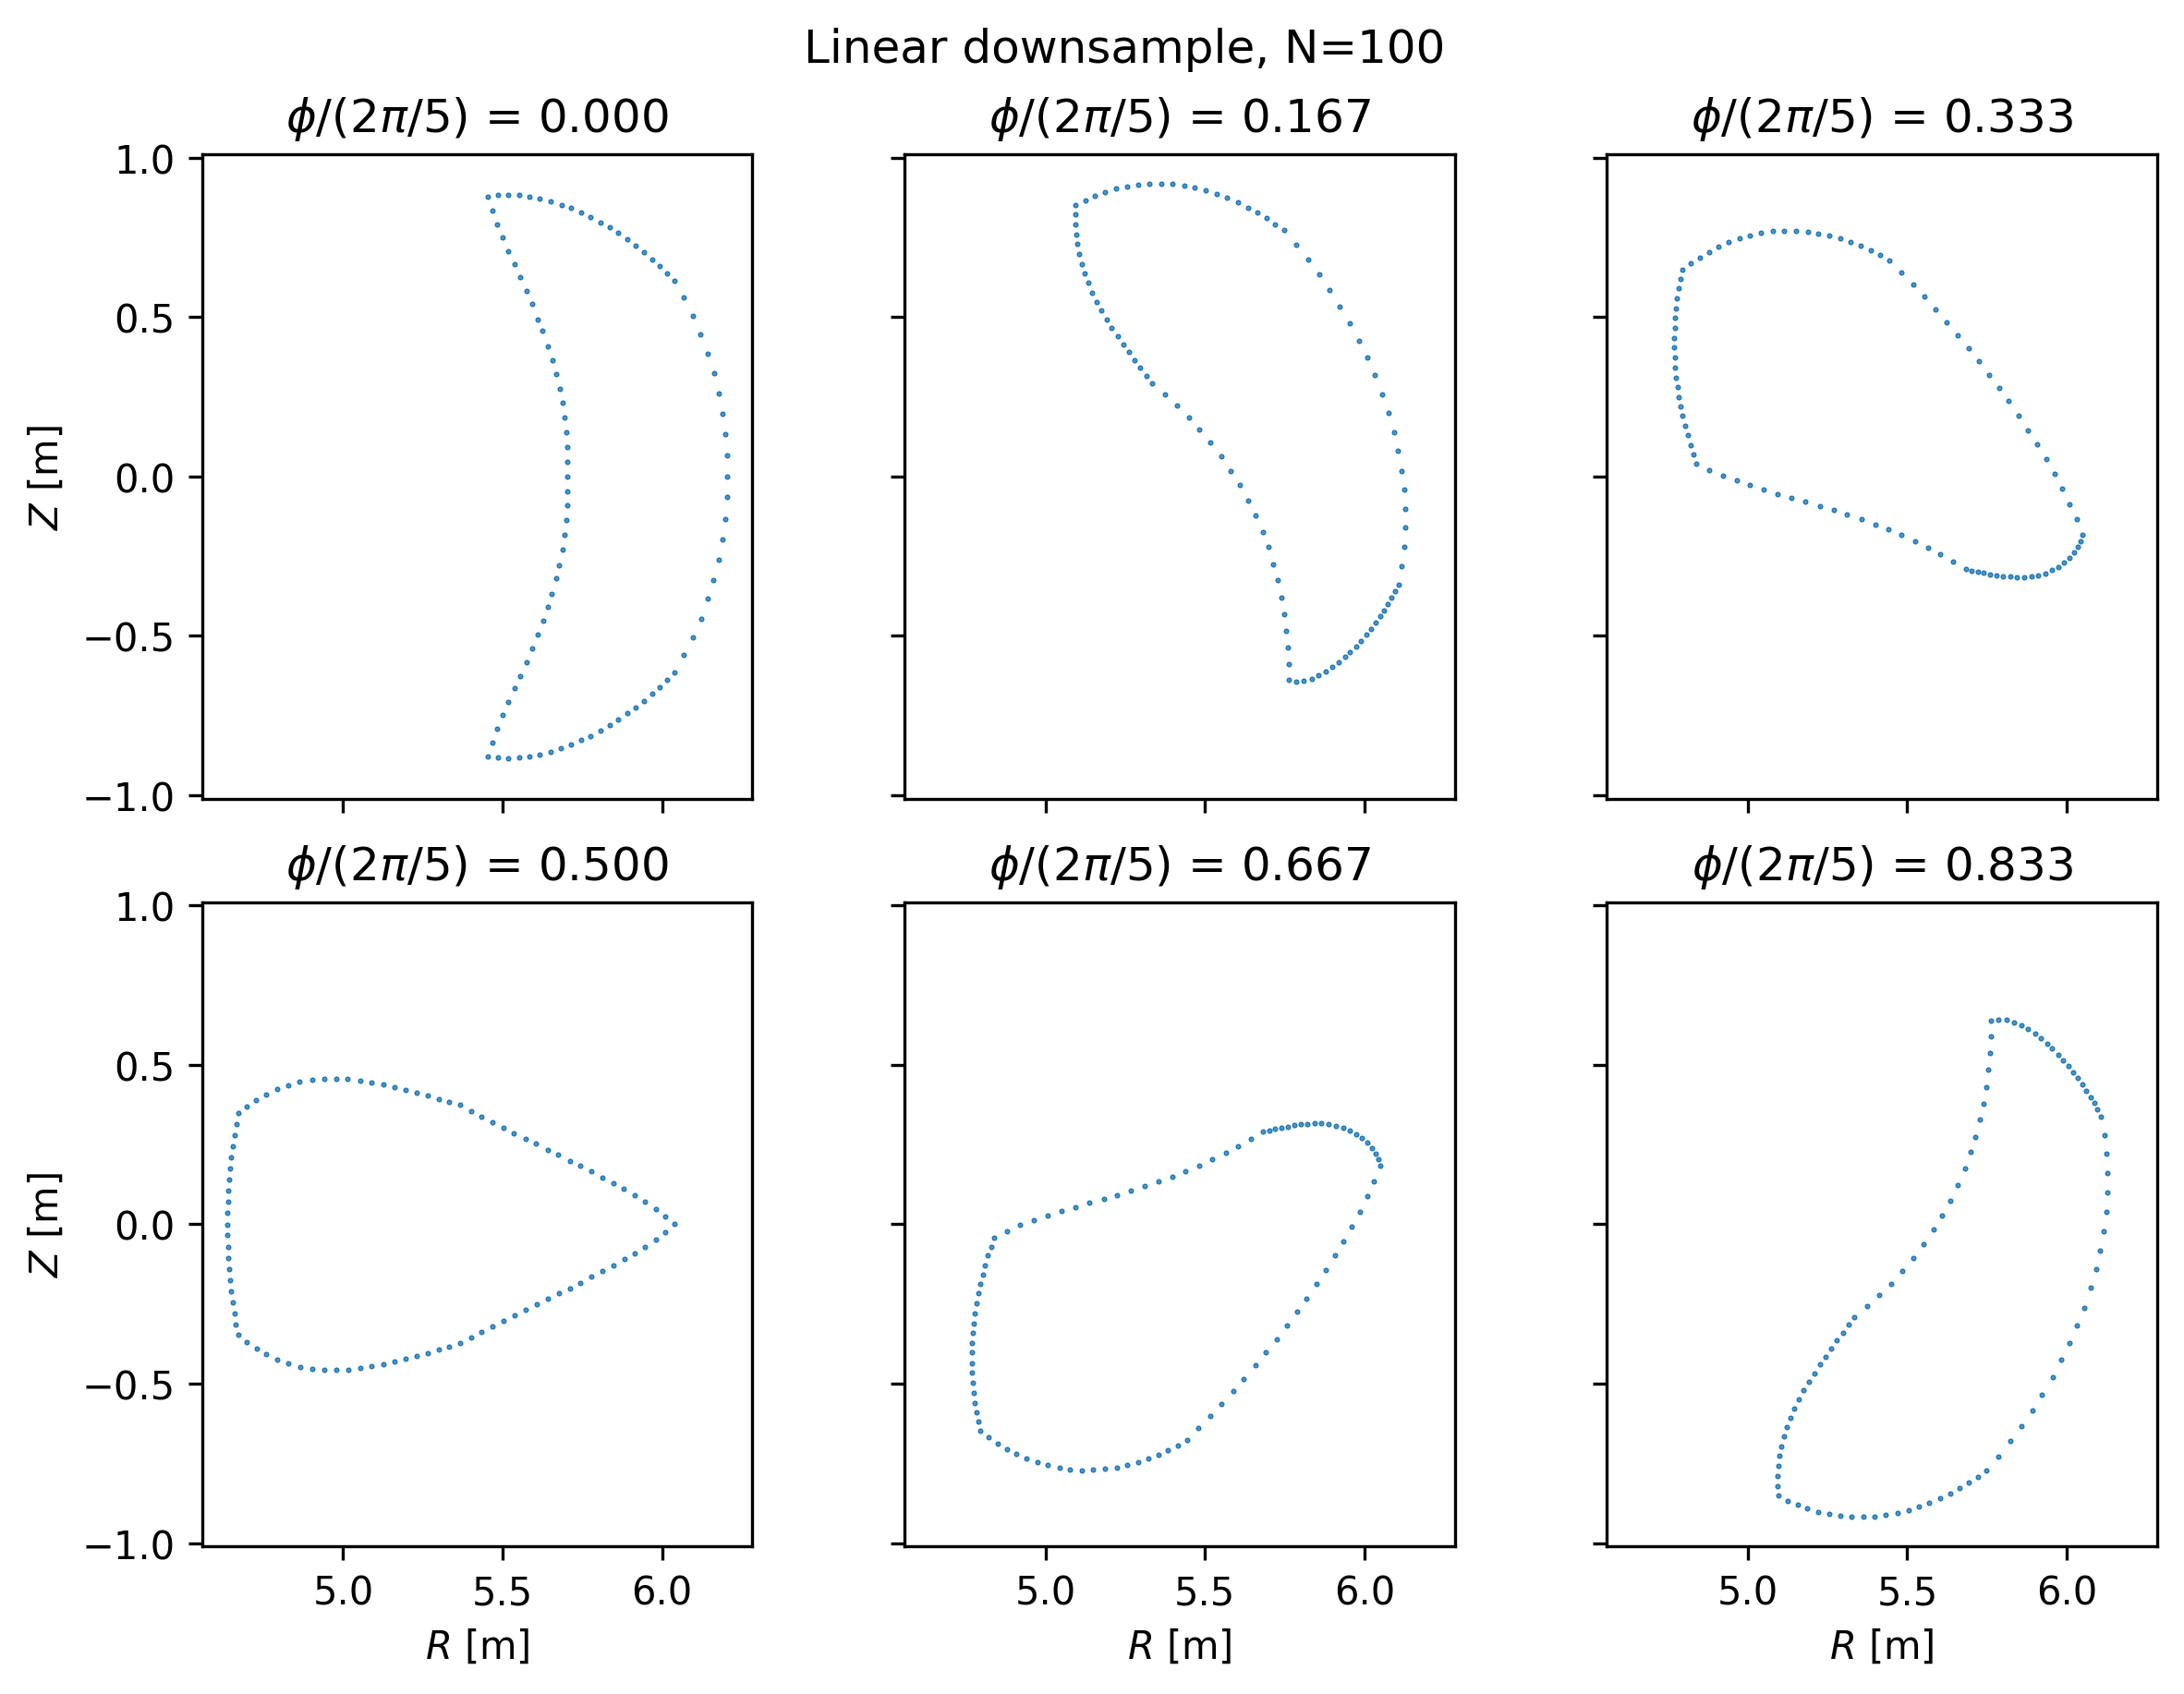

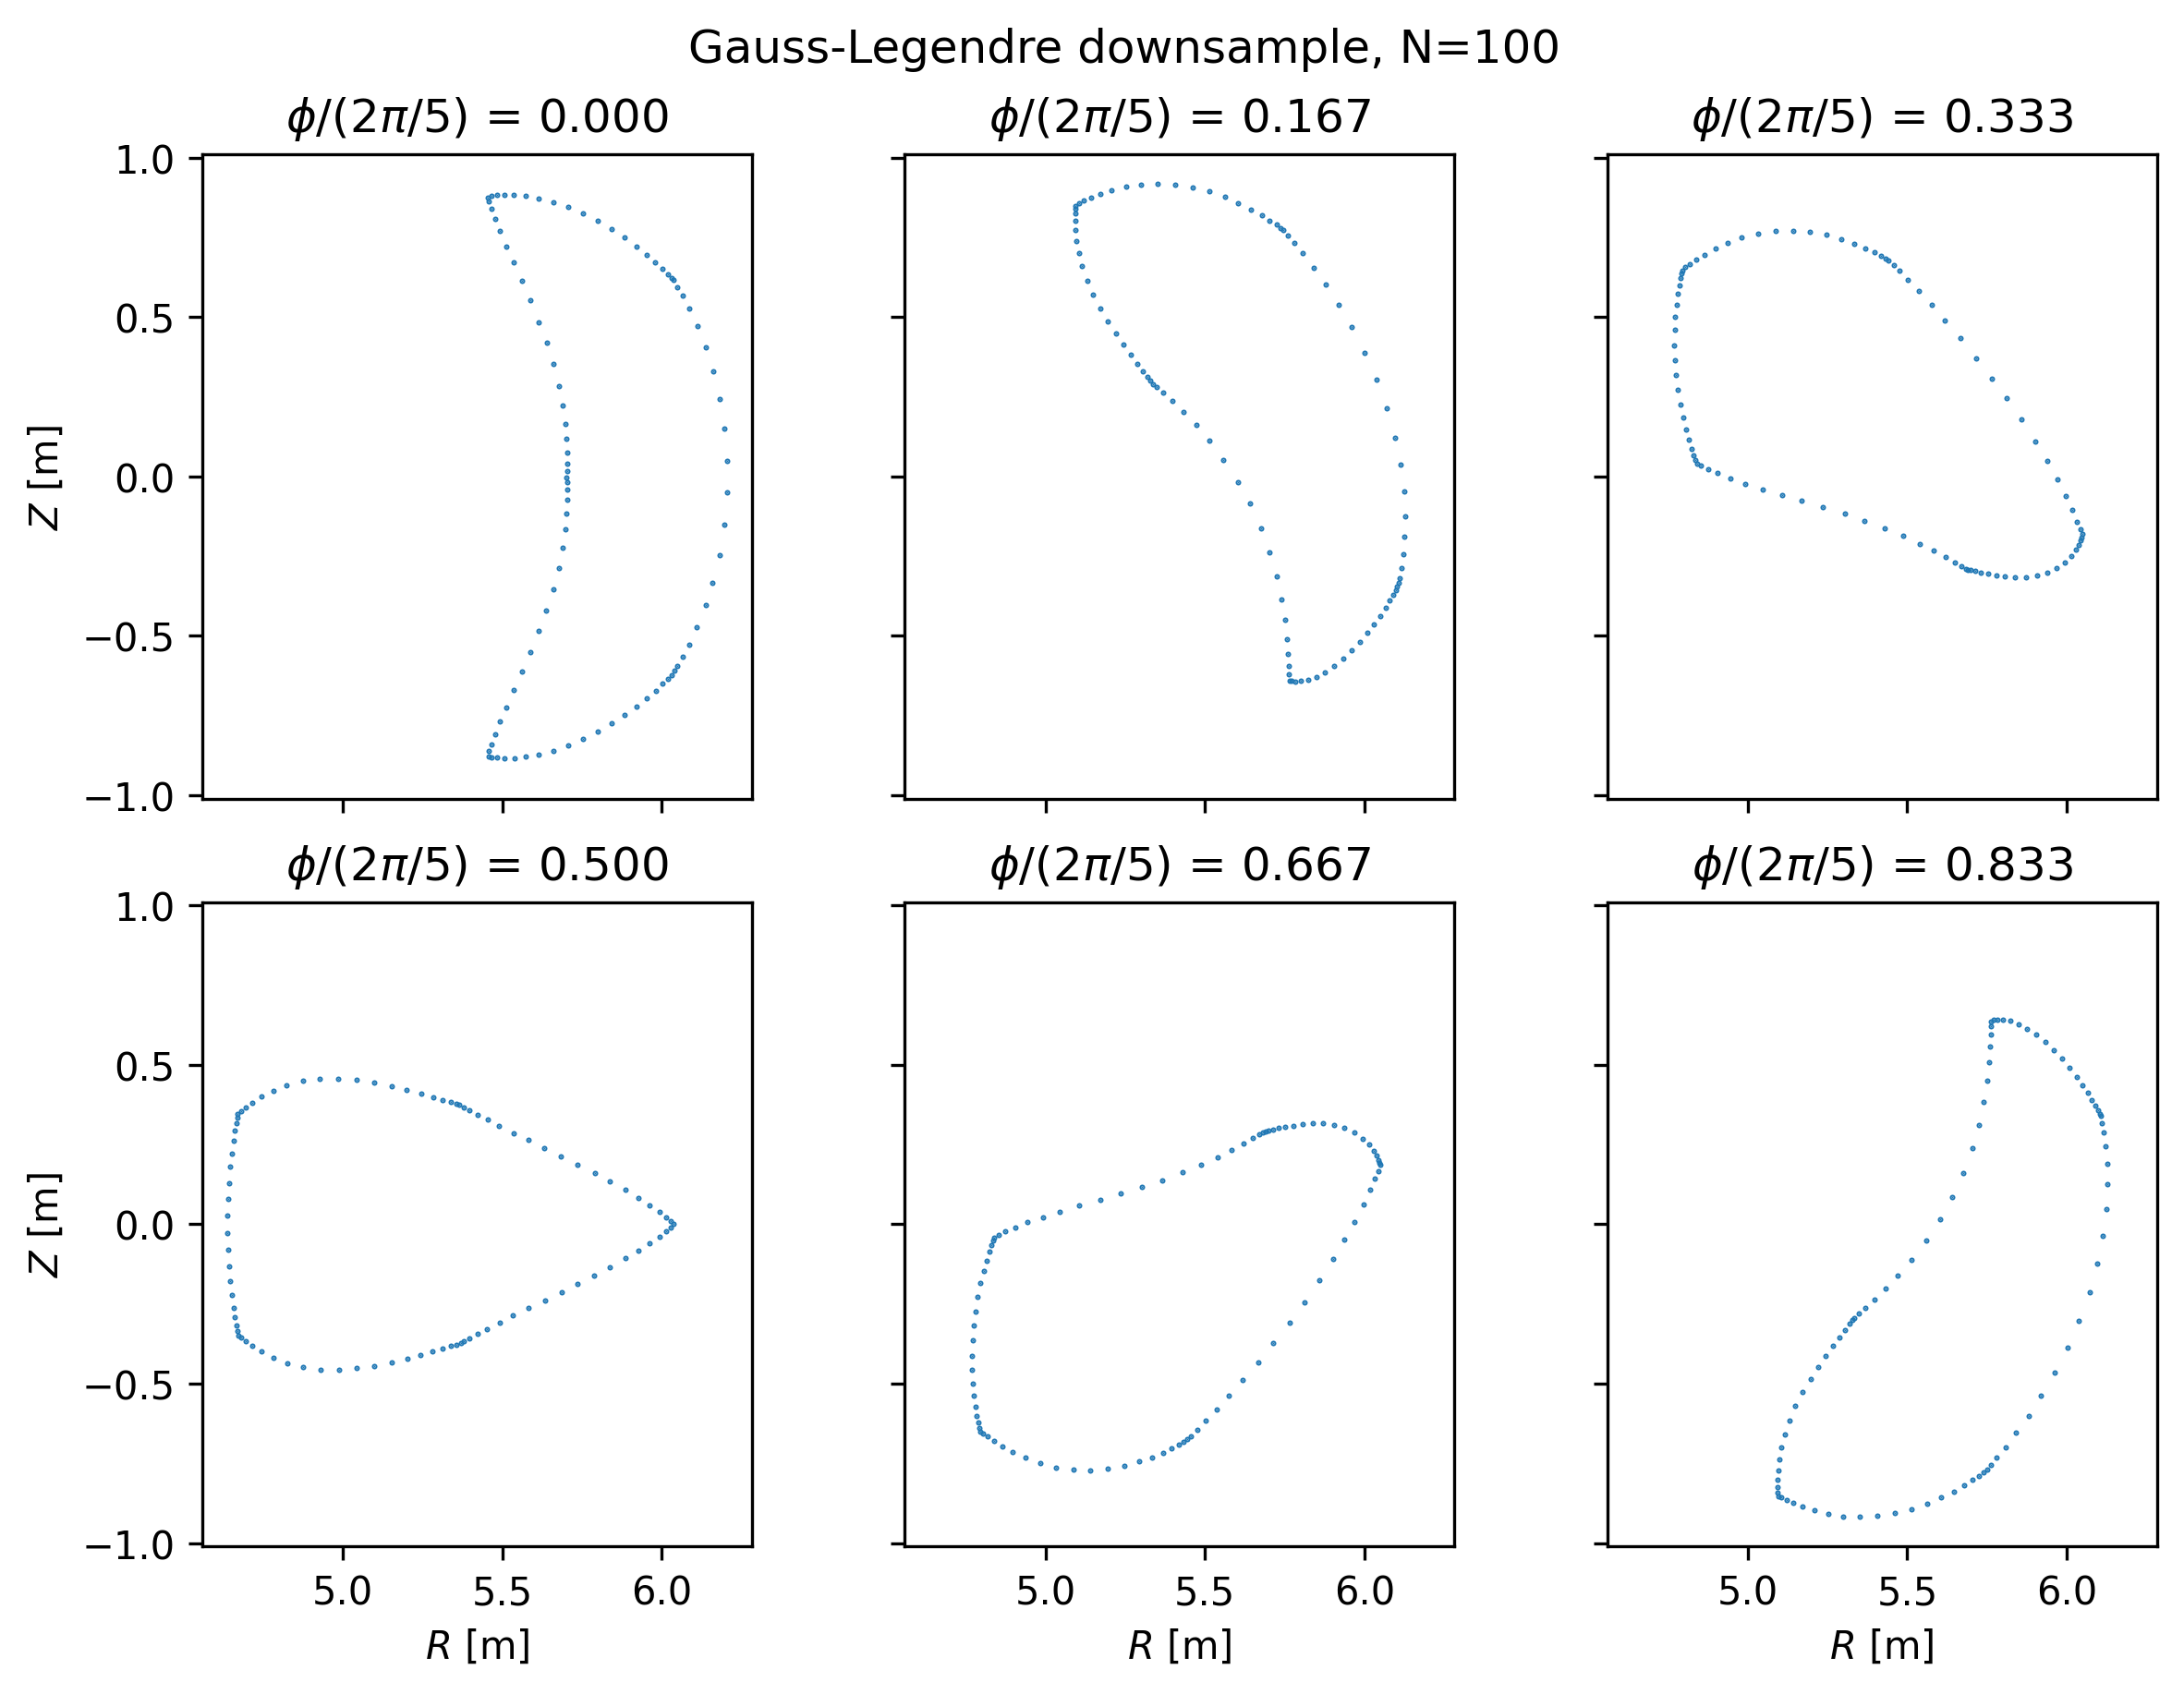

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

plt.rcParams['figure.dpi'] = 300

def closest_grid(ideal_grid, data):
    idxs = np.array([])
    closest_grid = np.array([])
    data_less= np.copy(data)

    for ideal_pt in ideal_grid:
        dists = np.abs(data_less - ideal_pt)
        min_dist = np.min(dists)
        idx = np.where(np.abs(data - ideal_pt) == min_dist)[0][0]
        idxs = np.append(idxs, idx)
        closest_grid = np.append(closest_grid, data[idx])
        data_less = np.delete(data_less, idx)

    idxs = idxs.astype(int)
    return closest_grid, idxs

def gauss_legendre_grid(a=0, b=2*np.pi, npts=100):
    gauss_legendre_grid = np.polynomial.legendre.leggauss(npts)[0]
    gauss_legendre_grid = 0.5 * (gauss_legendre_grid + 1) * (b - a) + a
    return gauss_legendre_grid


with open("./output/separatrix_plotting.json", "r") as f:
    data = json.load(f)
αs_data = np.array(data["alphas"])
ζs_data = np.array(data["phis"])
Rs_data = np.array(data["rs"])
Zs_data = np.array(data["zs"])

ζs_data_unique = np.unique(ζs_data)

starts = np.linspace(0, 2*np.pi, 5, False)
gs_grids = [*map(lambda a: gauss_legendre_grid(a, a+ 2*np.pi/5, 20)[:-1], starts)]
gs_grid = np.concatenate(gs_grids)
ideal_αgrids = [np.linspace(0, 2*np.pi, 100, False), gs_grid]
titles = ["Linear downsample, N=100", "Gauss-Legendre downsample, N=100"]

for ideal_αgrid, title in zip(ideal_αgrids, titles):
    n_plots = len(ζs_data_unique)
    n_cols = int(np.ceil(np.sqrt(n_plots)))
    n_rows = int(np.ceil(n_plots / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, constrained_layout=True, figsize=(8, 6))
    axes = np.hstack(axes)

    for i, ζ in enumerate(ζs_data_unique):
        idx_slice = np.where(ζs_data == ζ)[0]

        # select data in this 2D slice
        αs_data_2Dslice = αs_data[idx_slice]
        Rs_data_2Dslice = Rs_data[idx_slice]
        Zs_data_2Dslice = Zs_data[idx_slice]

        αs_data_2Dslice_pruned, idxs = closest_grid(ideal_αgrid, αs_data_2Dslice)
        Rs_data_2Dslice_pruned = Rs_data_2Dslice[idxs]
        Zs_data_2Dslice_pruned = Zs_data_2Dslice[idxs]

        ax = axes[i]
        scatter = ax.scatter(Rs_data_2Dslice_pruned, Zs_data_2Dslice_pruned, 0.2)
        ax.set_aspect('equal')
        ax.set_title(fr"$\phi / (2\pi/5)$ = {ζ*5/(2*np.pi):.3f}")
        ax.set_xlabel(r'$R$ [m]')
        ax.set_ylabel(r'$Z$ [m]')
        ax.label_outer()

    plt.suptitle(title)
    plt    

Let's now export the separatrix data stored in "separatrix_fitting.json" to some different downsamples. 

In [ ]:
# import numpy as np
# import json

# def closest_grid(ideal_grid, data):
#     idxs = np.array([])
#     closest_grid = np.array([])
#     data_less= np.copy(data)

#     for ideal_pt in ideal_grid:
#         dists = np.abs(data_less - ideal_pt)
#         min_dist = np.min(dists)
#         idx = np.where(np.abs(data - ideal_pt) == min_dist)[0][0]
#         idxs = np.append(idxs, idx)
#         closest_grid = np.append(closest_grid, data[idx])
#         data_less = np.delete(data_less, idx)

#     idxs = idxs.astype(int)
#     return closest_grid, idxs

# def gauss_legendre_grid(a=0, b=2*np.pi, npts=100):
#     gauss_legendre_grid = np.polynomial.legendre.leggauss(npts)[0]
#     gauss_legendre_grid = 0.5 * (gauss_legendre_grid + 1) * (b - a) + a
#     return gauss_legendre_grid


# with open("./output/separatrix_fitting.json", "r") as f:
#     data = json.load(f)
# αs_data = np.array(data["alphas"])
# ζs_data = np.array(data["phis"])
# Rs_data = np.array(data["rs"])
# Zs_data = np.array(data["zs"])

# ζs_data_unique = np.unique(ζs_data)

# starts = np.linspace(0, 2*np.pi, 5, False)
# gs_grids1 = [*map(lambda a: gauss_legendre_grid(a, a+ 2*np.pi/5, 20)[:-1], starts)]
# gs_grid1 = np.concatenate(gs_grids1)
# gs_grids2 = [*map(lambda a: gauss_legendre_grid(a, a+ 2*np.pi/5, 40)[:-1], starts)]
# gs_grid2 = np.concatenate(gs_grids2)
# gs_grids3 = [*map(lambda a: gauss_legendre_grid(a, a+ 2*np.pi/5, 60)[:-1], starts)]
# gs_grid3 = np.concatenate(gs_grids3)
# ideal_αgrids = [np.linspace(0, 2*np.pi, 20, False),
#                 np.linspace(0, 2*np.pi, 100, False), 
#                 np.linspace(0, 2*np.pi, 200, False),
#                 np.linspace(0, 2*np.pi, 300, False),
#                 gs_grid1,
#                 gs_grid2,
#                 gs_grid3]
# titles = ["linear_downsample_Mpts=20",
#           "linear_downsample_Mpts=100", 
#           "linear_downsample_Mpts=200", 
#           "linear_downsample_Mpts=300", 
#           "gauss_legendre_downsample_Mpts=100",
#           "gauss_legendre_downsample_Mpts=200",
#           "gauss_legendre_downsample_Mpts=300"]

# for ideal_αgrid, title in zip(ideal_αgrids, titles):
#     αs_data_pruned = np.array([])
#     ζs_data_pruned = np.array([])
#     Rs_data_pruned = np.array([])
#     Zs_data_pruned = np.array([])

#     for i, ζ in enumerate(ζs_data_unique):
#         idx_slice = np.where(ζs_data == ζ)[0]

#         # select data in this 2D slice
#         αs_data_2Dslice = αs_data[idx_slice]
#         Rs_data_2Dslice = Rs_data[idx_slice]
#         Zs_data_2Dslice = Zs_data[idx_slice]

#         # prune the data
#         αs_data_2Dslice_pruned, idxs = closest_grid(ideal_αgrid, αs_data_2Dslice)
#         Rs_data_2Dslice_pruned = Rs_data_2Dslice[idxs]
#         Zs_data_2Dslice_pruned = Zs_data_2Dslice[idxs]
#         ζs_data_2Dslice_pruned = ζ * np.ones_like(αs_data_2Dslice_pruned)

#         # append the data
#         αs_data_pruned = np.append(αs_data_pruned, αs_data_2Dslice_pruned)
#         ζs_data_pruned = np.append(ζs_data_pruned, ζs_data_2Dslice_pruned)
#         Rs_data_pruned = np.append(Rs_data_pruned, Rs_data_2Dslice_pruned)
#         Zs_data_pruned = np.append(Zs_data_pruned, Zs_data_2Dslice_pruned)
        
#     results = {
#             "alphas": αs_data_pruned.tolist(),
#             "phis":   ζs_data_pruned.tolist(),
#             "rs":     Rs_data_pruned.tolist(),
#             "zs":     Zs_data_pruned.tolist()
#         }

#     import json
#     with open(f"./output/separatrix_fitting_{title}.json", "w") as outfile:
#         json.dump(results , outfile, indent=2)

### Finding the Fourier-Zernike series

Now, we will solve for the coefficients $R_{lmn}$ that satisfy the aforementioned boundary condition. We abbreviate this equation as
$$\sum_{l,m,n}R_{lmn}f_{lmn}(\tilde\rho(1, \alpha), \tilde\theta(1, \alpha,\zeta), \zeta)=R^\textrm{LCFS}(\alpha,\zeta),$$
where 
$$f_{lmn}\equiv \mathcal{R}_l^{|m|}(\tilde\rho(1,g(1, \alpha)))\mathcal{F}^m(\tilde\theta(1, g(1, \alpha),\zeta))\mathcal{F}^n(\zeta).$$
In order to solve for the coefficients, we seek the linear least squares solution
$$R_{lmn}=\textrm{argmin}\sum_i \left(R_{lmn}f_{lmn}(\alpha_i,\zeta_i) - R^\textrm{LCFS}(\alpha_i,\zeta_i)\right)^2.$$
More specifically, as the points $\textbf{r}_i$ are not uniformly spaced, we can add a weight
$$R_{lmn}=\textrm{argmin}\sum_i \left(\sqrt{w_i}R_{lmn}f_{lmn}(\alpha_i,\zeta_i) - \sqrt{w_i}R^\textrm{LCFS}(\alpha_i,\zeta_i)\right),$$
where 
$$w_i=\frac{\Delta r_++\Delta r_-}{2}$$
is the average of the distance to the data points on either side.


<module 'matplotlib.pyplot' from '/opt/miniconda3/envs/islands_opt/lib/python3.12/site-packages/matplotlib/pyplot.py'>

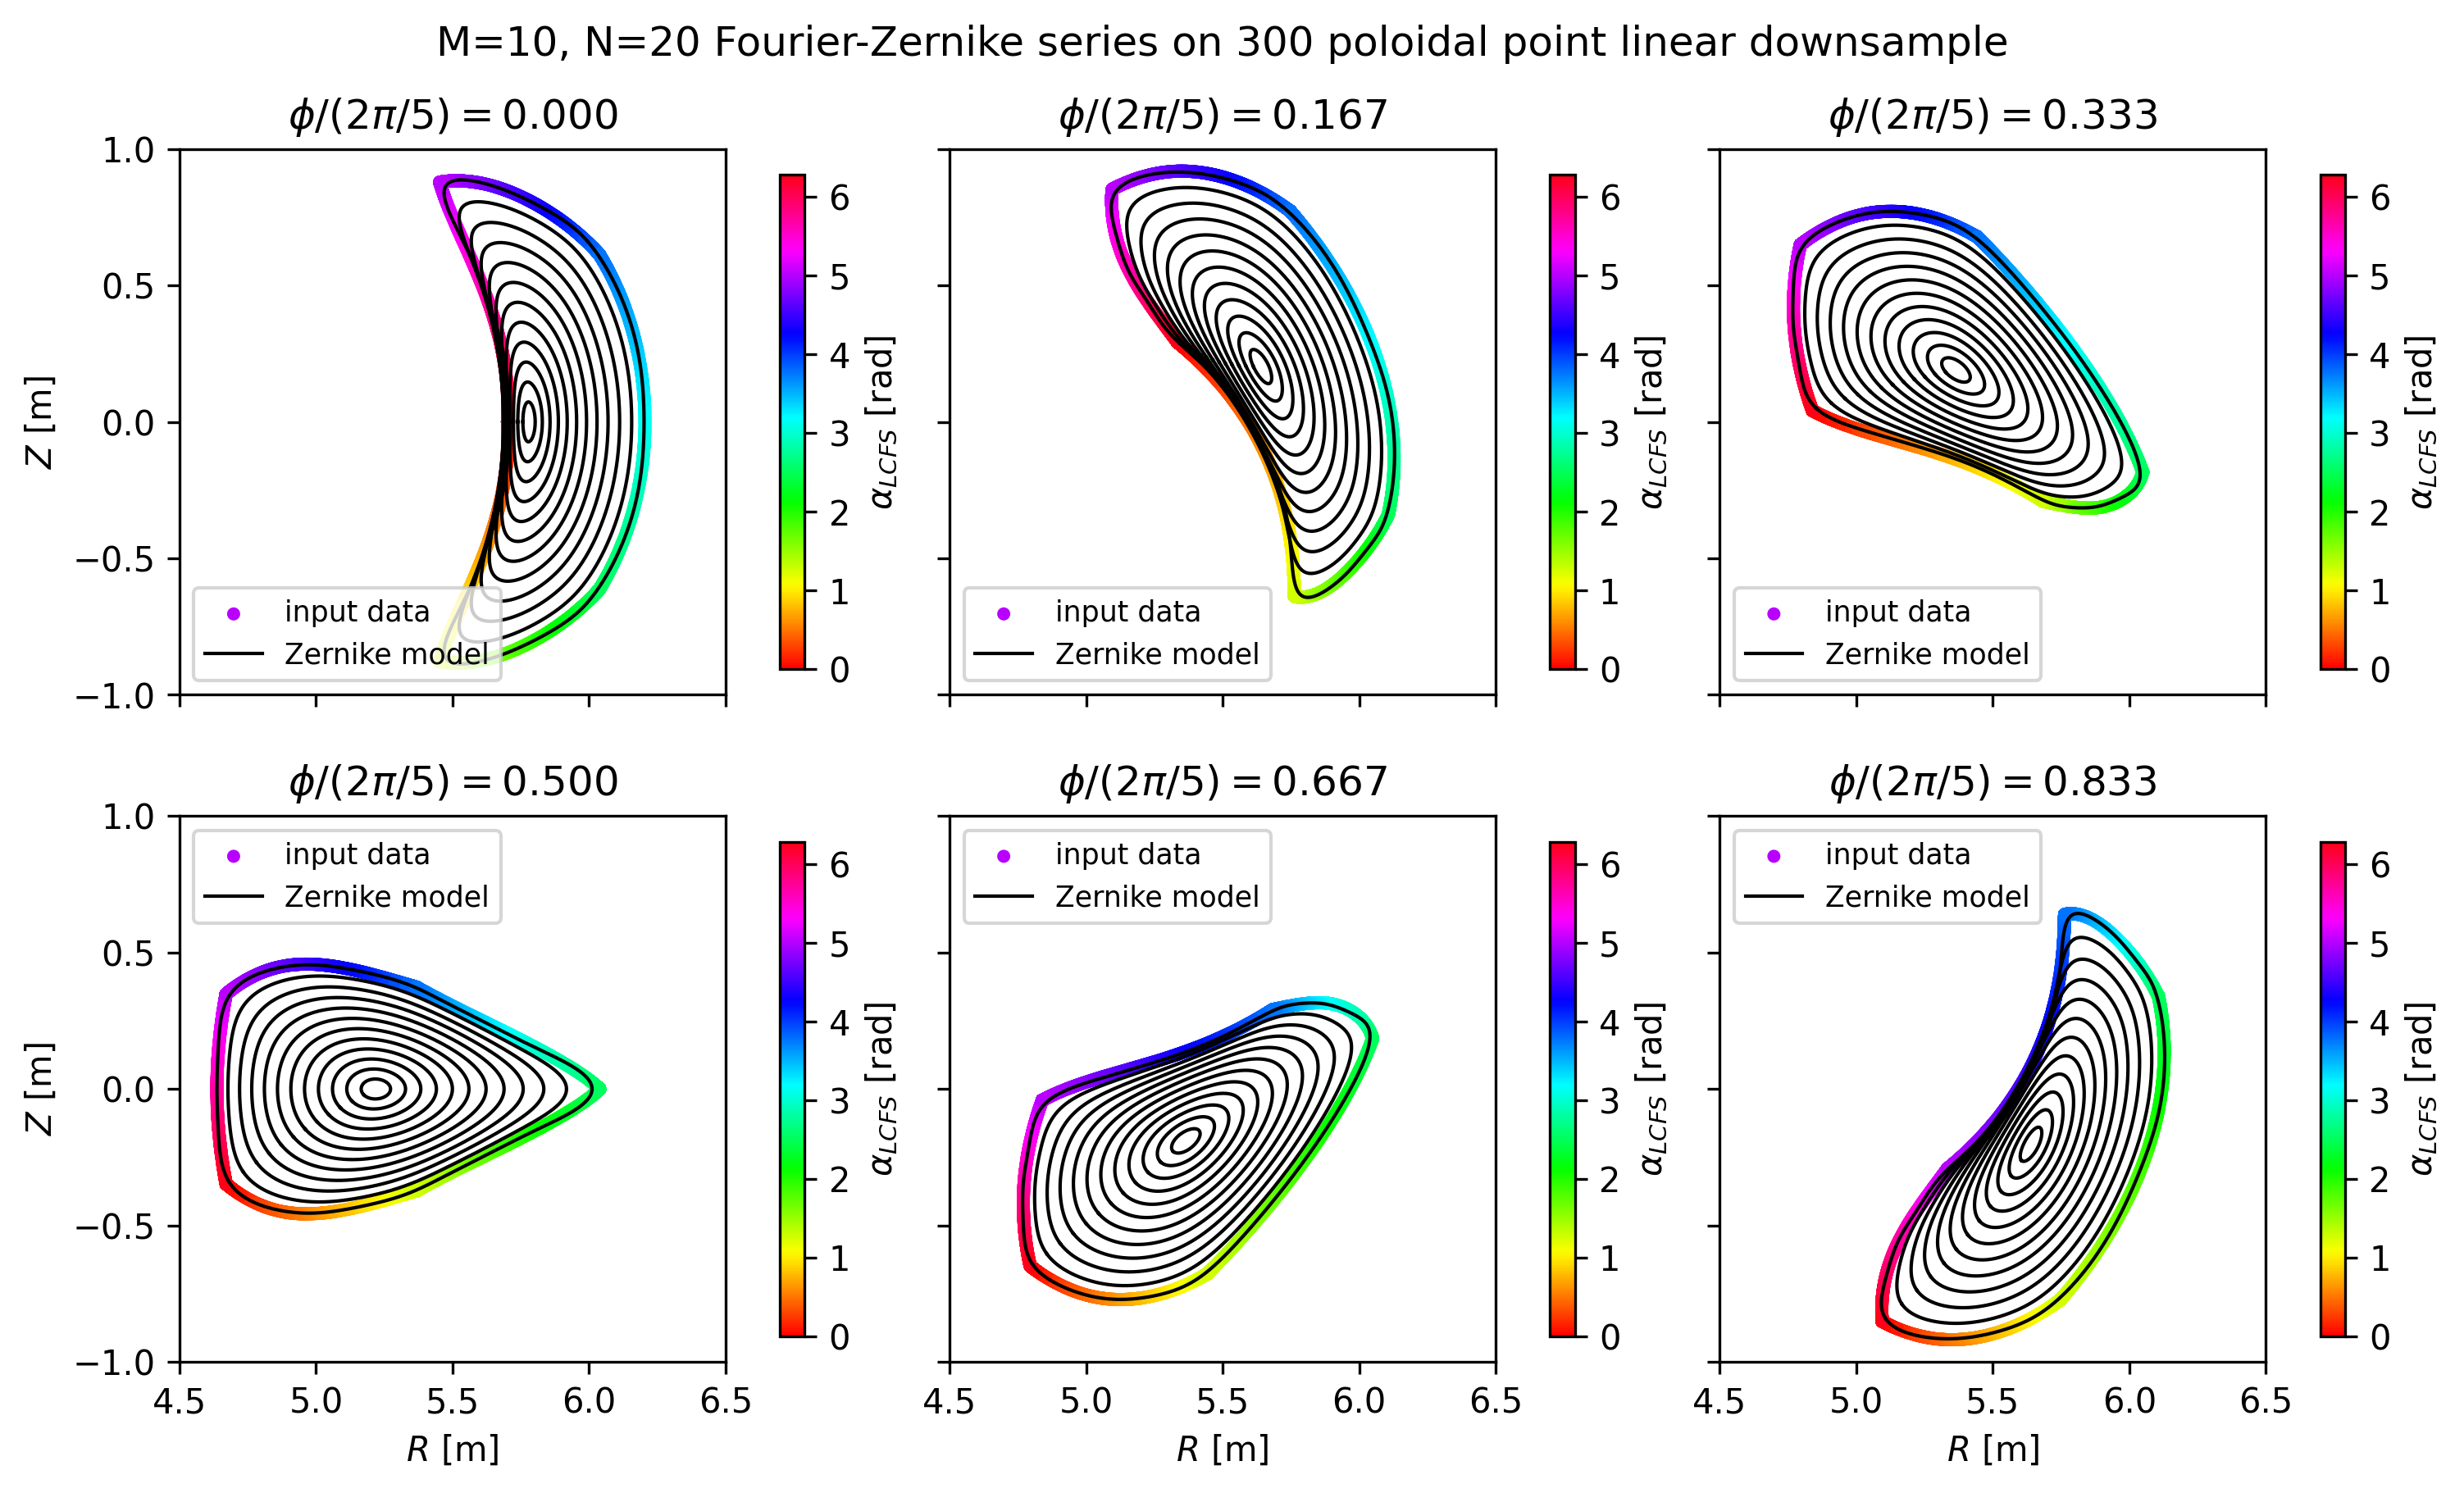

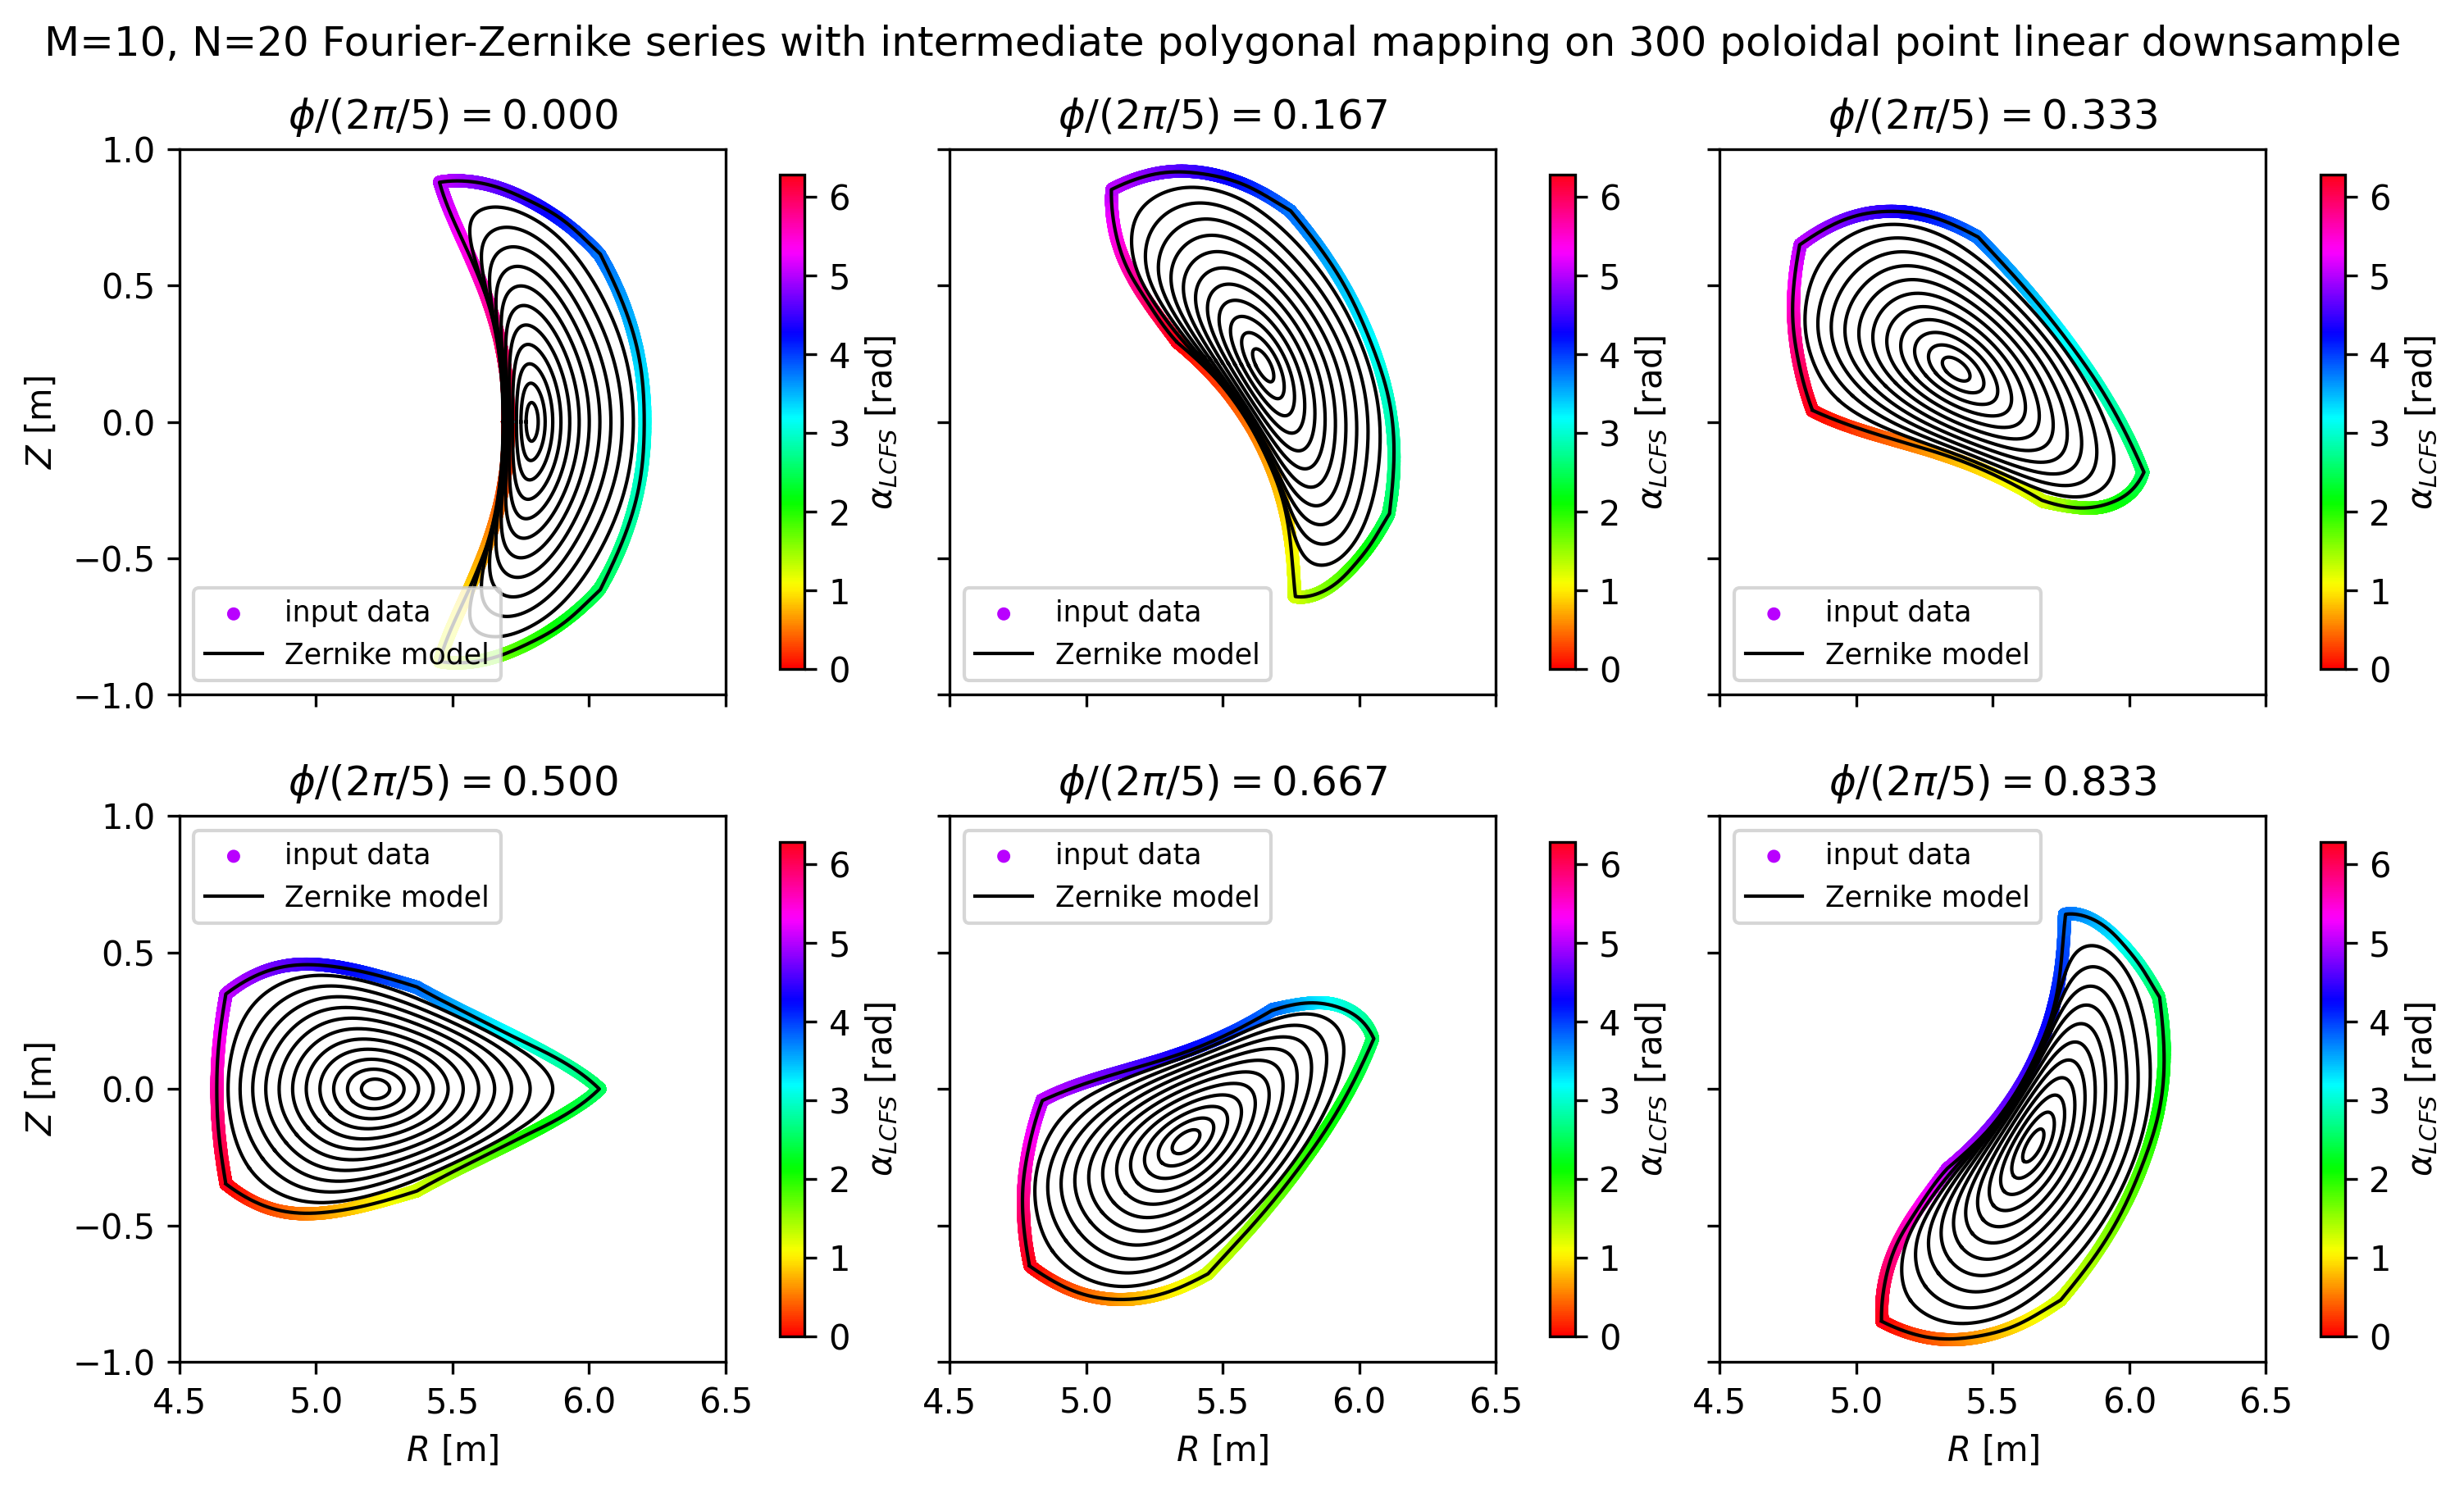

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
from desc.basis import FourierZernikeBasis
from scipy.special import hyp2f1

plt.rcParams['figure.dpi'] = 300

# returns ρ_tilde, θ_tilde as function of ρ, θ
def tilde(ρs, αs, Nsides):
    a = 2.0 / Nsides
    b = 1.0 / Nsides
    c = (Nsides + 1.0) / Nsides
    ρs, αs = map(lambda x: np.atleast_1d(np.asarray(x)), (ρs, αs))
    αs = αs - np.e ** (-(Nsides-3)/12) * np.sin(αs * Nsides) / Nsides
    ws = ρs * np.e ** (1j * αs)
    Ps = np.array([hyp2f1(a, b, c, w ** Nsides) * w for w in ws])
    P0s = np.array([hyp2f1(a, b, c, 1) for ρ in ρs])
    Phats = Ps / P0s
    ρ_tildes = np.abs(Phats)
    α_tildes = np.angle(Phats)
    α_tildes = np.where(α_tildes < 0, α_tildes + 2 * np.pi, α_tildes)
    return ρ_tildes, α_tildes

# load the data to perform the fitting to
with open("./output/separatrix_fitting_linear_downsample_Mpts=300.json", "r") as f:
    data = json.load(f)
αs_data = np.array(data["alphas"])
ζs_data = np.array(data["phis"])
Rs_data = np.array(data["rs"])
Zs_data = np.array(data["zs"])

# # calculate weights based on distance between data points
# Δr = np.zeros_like(Rs_data)
# for i in range(len(Rs_data)):
#     dists = np.sqrt((Rs_data - Rs_data[i])**2 + (Zs_data - Zs_data[i])**2)
#     dists = dists[dists != 0]
#     Δr[i] = np.min(dists)
# w_mat = np.diag((Δr)**0.5)
w_mat = np.diag(np.ones_like(Rs_data))

# load the data to plot
with open("./output/separatrix_plotting.json", "r") as f:
    data = json.load(f)
αs_data_plotting = np.array(data["alphas"])
ζs_data_plotting = np.array(data["phis"])
Rs_data_plotting = np.array(data["rs"])
Zs_data_plotting = np.array(data["zs"])

# plot
n_plots = len(np.unique(ζs_data_plotting))
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))

### no intermediate mapping

# calculate coefficients for the linear lstsq fit
L, M, N = 0, 10, 20
basis = FourierZernikeBasis(L, M, N)
modes = basis.modes
modes = modes[modes[:, 2] % 5 == 0] # only keep non-symmetry-breaking modes
ρs_data = np.ones_like(αs_data)
θs_data = (αs_data + ζs_data) % (2 * np.pi)
nodes = np.array([ρs_data, θs_data, ζs_data]).T
f_ij_lmn = basis.evaluate(nodes, modes=modes) 
R_lmn, _, _, _ = np.linalg.lstsq(w_mat @ f_ij_lmn, w_mat @ Rs_data, rcond=None) 
Z_lmn, _, _, _ = np.linalg.lstsq(w_mat @ f_ij_lmn, w_mat @ Zs_data, rcond=None) 

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, constrained_layout=True, figsize=(10, 6))
axes = np.hstack(axes)

nα = 1200
ncontours = 12
αs = np.array([2 * np.pi * k / nα for k in range(nα)])
for i in range(n_plots):
    ax = axes[i]
    ζs = np.unique(ζs_data_plotting)[i]
    idx = np.where(ζs_data_plotting == ζs)
    scatter = ax.scatter(Rs_data_plotting[idx], Zs_data_plotting[idx], s=8, c=αs_data_plotting[idx], cmap='hsv', label='input data')
    ax.set_aspect('equal')
    ax.set_title(rf'$\phi / (2\pi/5) = {ζs*5/(2*np.pi):.3f}$')
    ax.set_xlabel(r'$R$ [m]')
    ax.set_ylabel(r'$Z$ [m]')
    ax.label_outer()
    ax.set_xlim(4.5, 6.5)
    ax.set_ylim(-1, 1)
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
    cbar.set_label(r'$\alpha_{LCFS}$ [rad]')

    for j in range(ncontours):
        ρs = np.ones_like(αs) * (j + 1) / ncontours
        ζs = np.ones_like(ρs) * ζs
        θs = αs + ζs
        nodes = np.array([ρs, θs, ζs]).T
        basis_vecs = basis.evaluate(nodes, modes=modes)
        Rs = basis_vecs @ R_lmn
        Zs = basis_vecs @ Z_lmn
        if j == 0:
            ax.plot(Rs, Zs, c='k', label='Zernike model', linewidth=1)
        else:
            ax.plot(Rs, Zs, c='k', linewidth=1)

    loc = 'lower left' if i < 3 else 'upper left'
    ax.legend(loc=loc, fontsize='small')

plt.suptitle(f"M={M}, N={N} Fourier-Zernike series on 300 poloidal point linear downsample")
plt

### with intermediate mapping

# calculate coefficients for the linear lstsq fit
L, M, N = 0, 10, 20
basis = FourierZernikeBasis(L, M, N)
modes = basis.modes
modes = modes[modes[:, 2] % 5 == 0] # only keep non-symmetry-breaking modes
ρs_tilde, αs_tilde = tilde(np.ones_like(αs_data), αs_data, 5)
ζs = ζs_data
θ_tilde = (αs_tilde + ζs) % (2 * np.pi)
nodes = np.array([ρs_tilde, θ_tilde, ζs]).T
f_ij_lmn = basis.evaluate(nodes, modes=modes) 
R_lmn, _, _, _ = np.linalg.lstsq(w_mat @ f_ij_lmn, w_mat @ Rs_data, rcond=None) 
Z_lmn, _, _, _ = np.linalg.lstsq(w_mat @ f_ij_lmn, w_mat @ Zs_data, rcond=None) 

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, constrained_layout=True, figsize=(10, 6))
axes = np.hstack(axes)

nα = 1200
ncontours = 12
αs = np.array([2 * np.pi * k / nα for k in range(nα)])
for i in range(n_plots):
    ax = axes[i]
    ζs = np.unique(ζs_data_plotting)[i]
    idx = np.where(ζs_data_plotting == ζs)
    scatter = ax.scatter(Rs_data_plotting[idx], Zs_data_plotting[idx], s=8, c=αs_data_plotting[idx], cmap='hsv', label='input data')
    ax.set_aspect('equal')
    ax.set_title(rf'$\phi / (2\pi/5) = {ζs*5/(2*np.pi):.3f}$')
    ax.set_xlabel(r'$R$ [m]')
    ax.set_ylabel(r'$Z$ [m]')
    ax.label_outer()
    ax.set_xlim(4.5, 6.5)
    ax.set_ylim(-1, 1)
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
    cbar.set_label(r'$\alpha_{LCFS}$ [rad]')

    for j in range(ncontours):
        ρs = np.ones_like(αs) * (j + 1) / ncontours
        ζs = np.ones_like(ρs) * ζs
        ρs_tilde, αs_tilde = tilde(ρs, αs, 5)
        θs_tilde = αs_tilde + ζs
        nodes = np.array([ρs_tilde, θs_tilde, ζs]).T
        basis_vecs = basis.evaluate(nodes, modes=modes)
        Rs = basis_vecs @ R_lmn
        Zs = basis_vecs @ Z_lmn
        if j == 0:
            ax.plot(Rs, Zs, c='k', label='Zernike model', linewidth=1)
        else:
            ax.plot(Rs, Zs, c='k', linewidth=1)

    loc = 'lower left' if i < 3 else 'upper left'
    ax.legend(loc=loc, fontsize='small')

plt.suptitle(f"M={M}, N={N} Fourier-Zernike series with intermediate polygonal mapping on 300 poloidal point linear downsample")
plt

Next, we show the results in 3D.

In [ ]:
import mpmath
import numpy as np
import json
from desc.basis import FourierZernikeBasis
from mpmath import hyp2f1
from mayavi import mlab
import matplotlib.pyplot as plt

# returns ρ_tilde, θ_tilde as function of ρ, θ
def tilde(ρs, αs, Nsides):
    a = 2.0 / Nsides
    b = 1.0 / Nsides
    c = (Nsides + 1.0) / Nsides
    ρs, αs = map(lambda x: np.atleast_1d(np.asarray(x)), (ρs, αs))
    αs = αs - np.e ** (-(Nsides-3)/12) * np.sin(αs * Nsides) / Nsides
    ws = ρs * np.e ** (1j * αs)
    Ps = np.array([hyp2f1(a, b, c, w ** Nsides) * w for w in ws])
    P0s = np.array([hyp2f1(a, b, c, 1) for ρ in ρs])
    Phats = Ps / P0s
    ρ_tildes = np.array([float(mpmath.norm(Phat)) for Phat in Phats])
    α_tildes = np.array([float(mpmath.phase(Phat)) for Phat in Phats])
    α_tildes = np.where(α_tildes < 0, α_tildes + 2 * np.pi, α_tildes)
    return ρ_tildes, α_tildes

# load the data to perform the fitting to
with open("./output/separatrix_fitting_linear_downsample_Mpts=300.json", "r") as f:
    data = json.load(f)
αs_data = np.array(data["alphas"])
ζs_data = np.array(data["phis"])
Rs_data = np.array(data["rs"])
Zs_data = np.array(data["zs"])

# # calculate weights based on distance between data points
# Δr = np.zeros_like(Rs_data)
# for i in range(len(Rs_data)):
#     dists = np.sqrt((Rs_data - Rs_data[i])**2 + (Zs_data - Zs_data[i])**2)
#     dists = dists[dists != 0]
#     Δr[i] = np.min(dists)
# w_mat = np.diag((Δr)**0.5)
w_mat = np.diag(np.ones_like(Rs_data))

# calculate coefficients for the linear lstsq fit
L, M, N = 0, 10, 20
basis = FourierZernikeBasis(L, M, N)
modes = basis.modes
modes = modes[modes[:, 2] % 5 == 0] # only keep non-symmetry-breaking modes
ρs_tilde, αs_tilde = tilde(np.ones_like(αs_data), αs_data, 5)
ζs = ζs_data
θ_tilde = (αs_tilde + ζs) % (2 * np.pi)
nodes = np.array([ρs_tilde, θ_tilde, ζs]).T
f_ij_lmn = basis.evaluate(nodes, modes=modes) 
R_lmn, _, _, _ = np.linalg.lstsq(w_mat @ f_ij_lmn, w_mat @ Rs_data, rcond=None) 
Z_lmn, _, _, _ = np.linalg.lstsq(w_mat @ f_ij_lmn, w_mat @ Zs_data, rcond=None) 

# plot
n_plots = len(np.unique(ζs_data))
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))

# plot in 3D
nα, nζ = 100, 500
αs = np.array([2 * np.pi * k / nα for k in range(nα)])
ζs = np.array([2 * np.pi * k / nζ for k in range(nζ)])
αs, ζs = map(np.ravel, np.meshgrid(αs, ζs))
ρs = np.ones_like(αs)
ρs_tilde, αs_tilde = tilde(ρs, αs, 5)
θs_tilde = (αs_tilde + ζs) % (2 * np.pi)
nodes = np.array([ρs_tilde, θs_tilde, ζs]).T

basis_vecs = basis.evaluate(nodes, modes=modes)
Rs = basis_vecs @ R_lmn
Zs = basis_vecs @ Z_lmn
Xs = Rs * np.cos(nodes[:, 2])
Ys = Rs * np.sin(nodes[:, 2])

sp = mlab.points3d(Xs, Ys, Zs, color=(1, 1, 1), mode="point")
sp.actor.property.render_points_as_spheres = True
sp.actor.property.point_size = 5
mlab.show()

Exception
Traceback (most recent call last):
  File "/opt/miniconda3/envs/islands_opt2/lib/python3.13/site-packages/mayavi/core/scene.py", line 230, in _handle_children
    obj.start()
    ~~~~~~~~~^^
  File "/opt/miniconda3/envs/islands_opt2/lib/python3.13/site-packages/mayavi/sources/vtk_data_source.py", line 201, in start
    self._update_data()
    ~~~~~~~~~~~~~~~~~^^
  File "/opt/miniconda3/envs/islands_opt2/lib/python3.13/site-packages/mayavi/sources/vtk_data_source.py", line 369, in _update_data
    pnt_attr, cell_attr = get_all_attributes(self.data)
                          ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
  File "/opt/miniconda3/envs/islands_opt2/lib/python3.13/site-packages/mayavi/sources/vtk_xml_file_reader.py", line 87, in get_all_attributes
    point_attr = get_attribute_list(obj.point_data)
                                    ^^^^^^^^^^^^^^
  File "tvtk_classes/data_set.py", line 373, in _get_point_data
    return wrap_vtk(self._vtk_obj.GetPointData())
  File "tvtk_classes/

AttributeError: 'NoneType' object has no attribute 'scalar_lut_manager'

: 

#### Convergence

Now, let's examine the convergence of the Fourier-Zernike series with and without the intermediate polygonal mapping to the raw data. The primary way we seek to do so is by determining the volume of the geometric XOR (more frequently called the symmetric difference) between the region enclosed by the raw separatrix data and the region enclosed by the fitted separatrix data. In order to accomplish this, we use the `shapely` library to calculate the area of the symmetric difference in each toroidal cross-section. This can then be generalized to a volume by noting that the volume in cylidrical coordinates is
$$V=\int_0^{2\pi}\mathrm{d}\phi\left(\int_{z_0}^{z_1}\mathrm{d}z\int_{r_0({z,\phi)}}^{r_1(z,\phi)}\mathrm{d}r r\right)=\int_0^{2\pi}\mathrm{d}\phi\left(\int_{z_0}^{z_1}\mathrm{d}z\int_{r_0^2({z,\phi)}/2}^{r_1^2(z,\phi)/2}\mathrm{d}u\right).$$
where the second line uses the simple substitution $u=r^2/2$. In other words, the volume of a torus defined by an inner and outer surface can be obtained by integrating the area of a scaled cross-section $(R^2/2, Z)$ over the toroidal angle. 









Geometrically, the process looks like this.

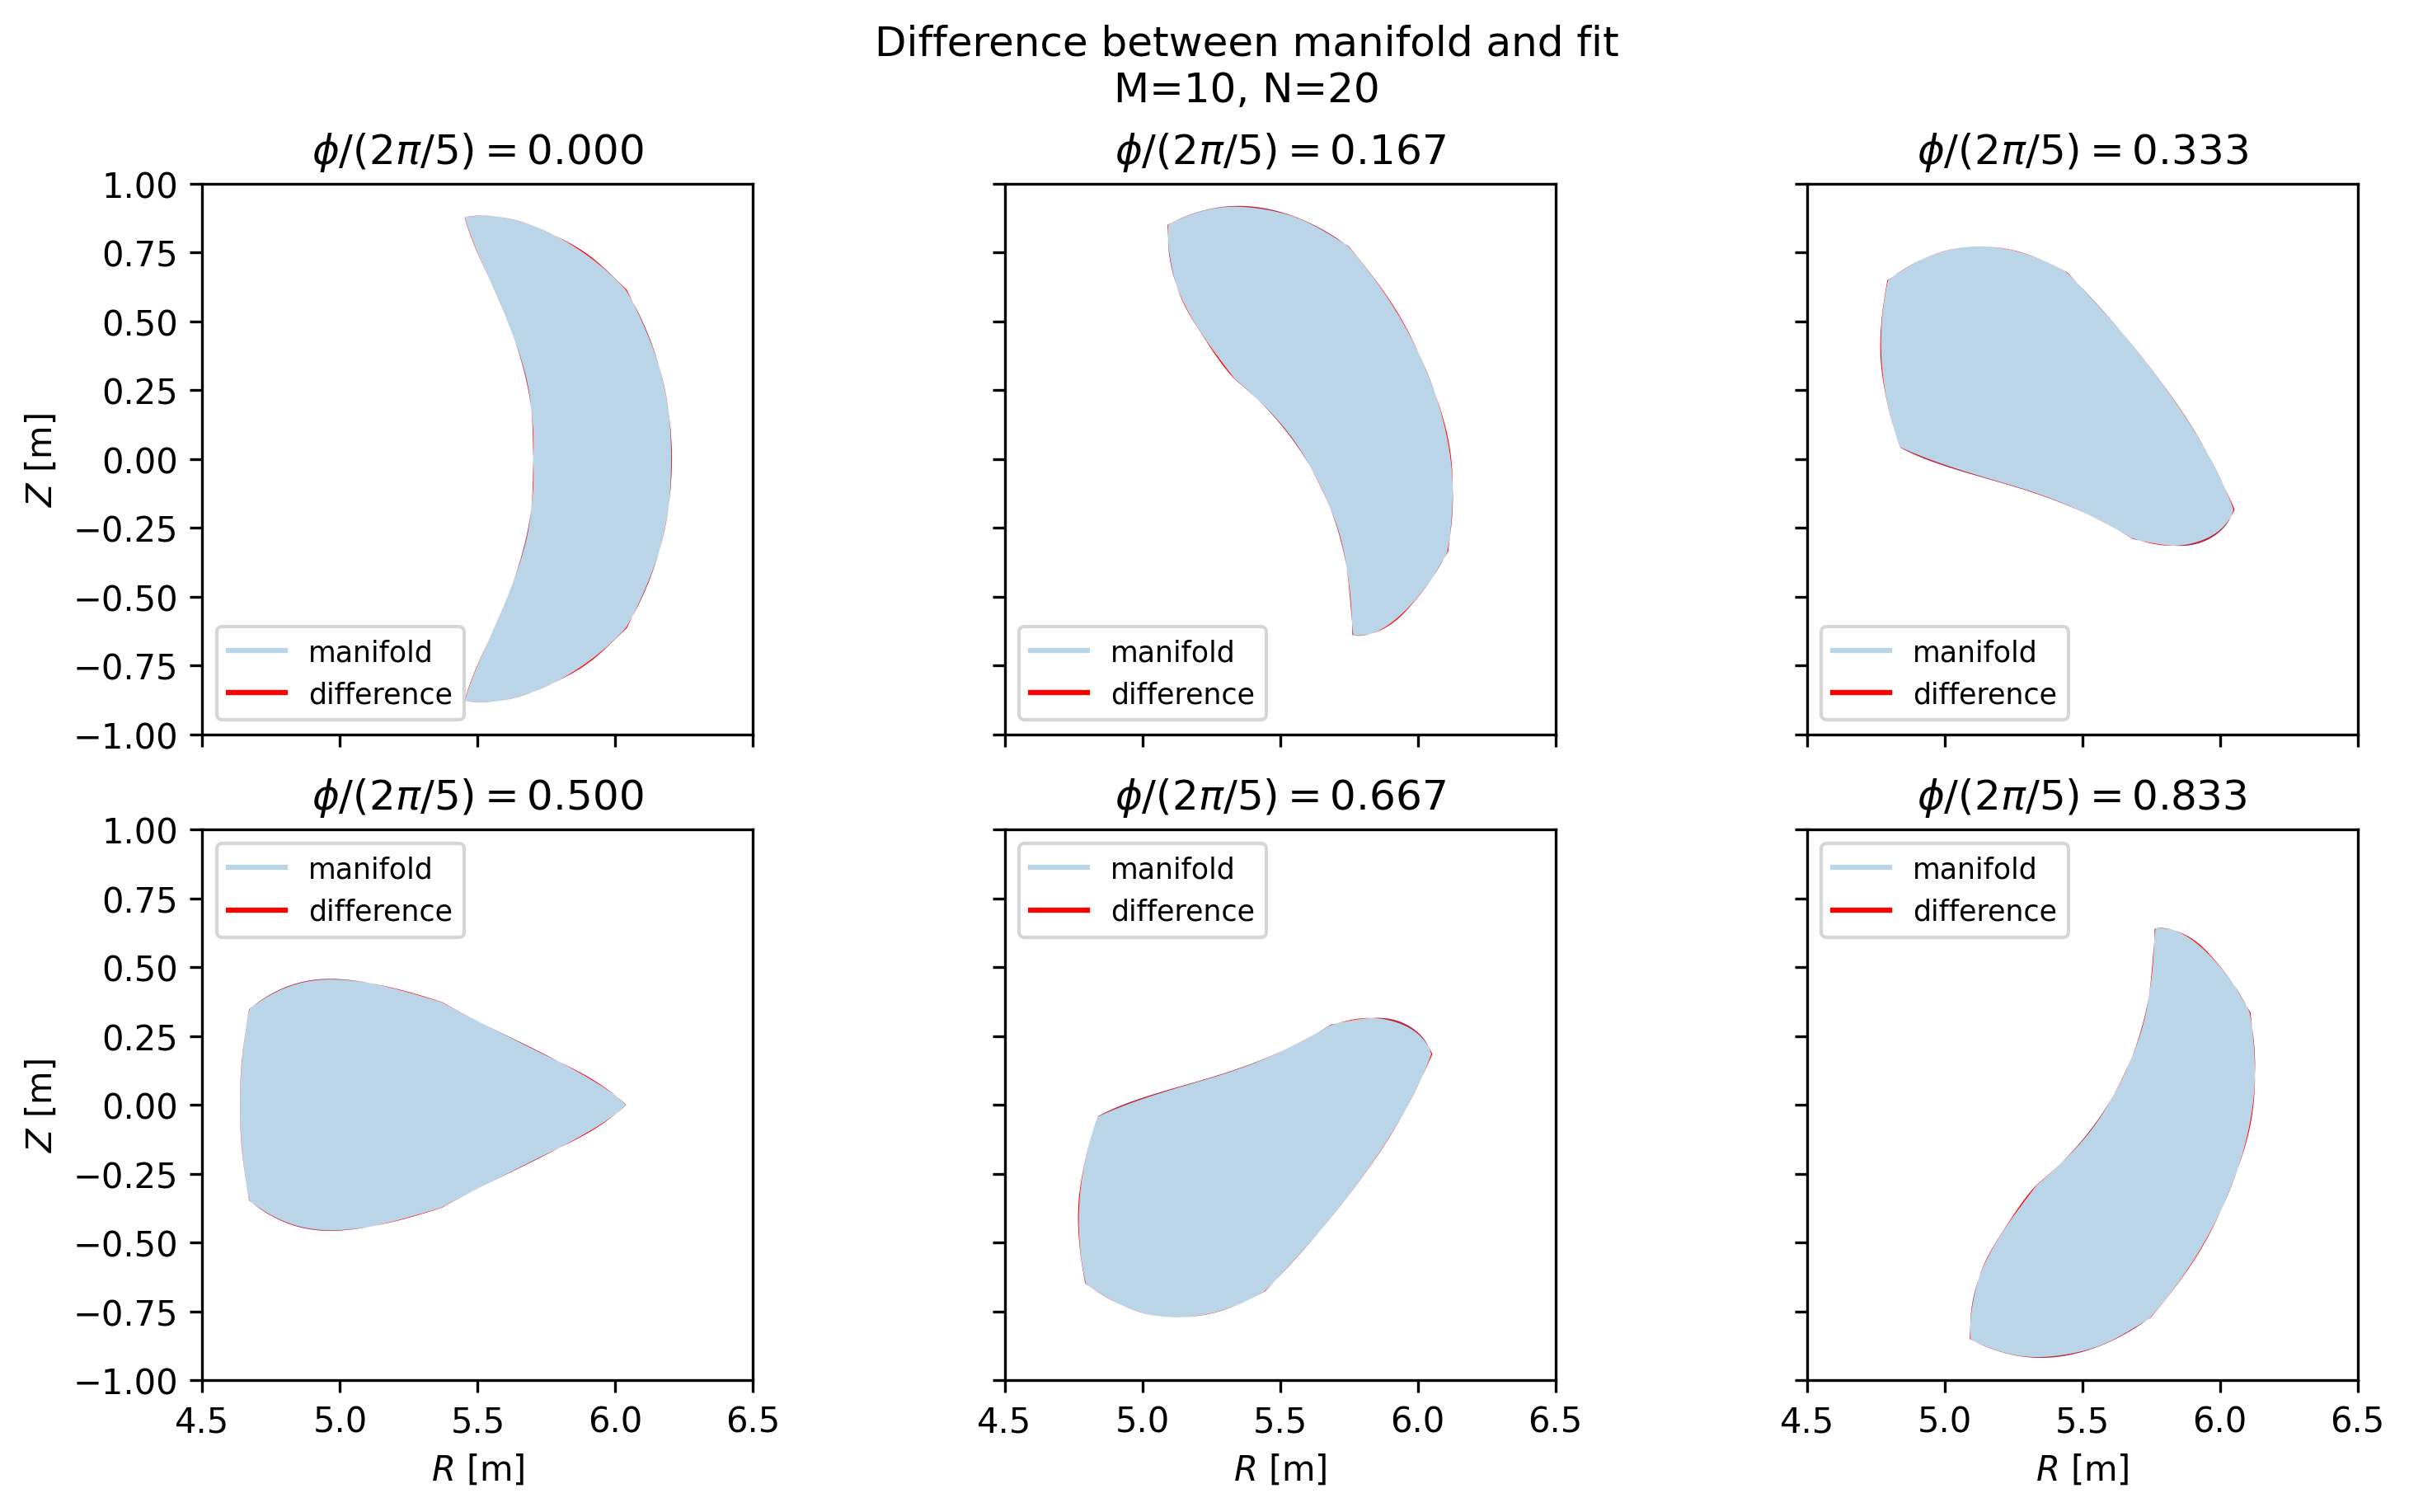

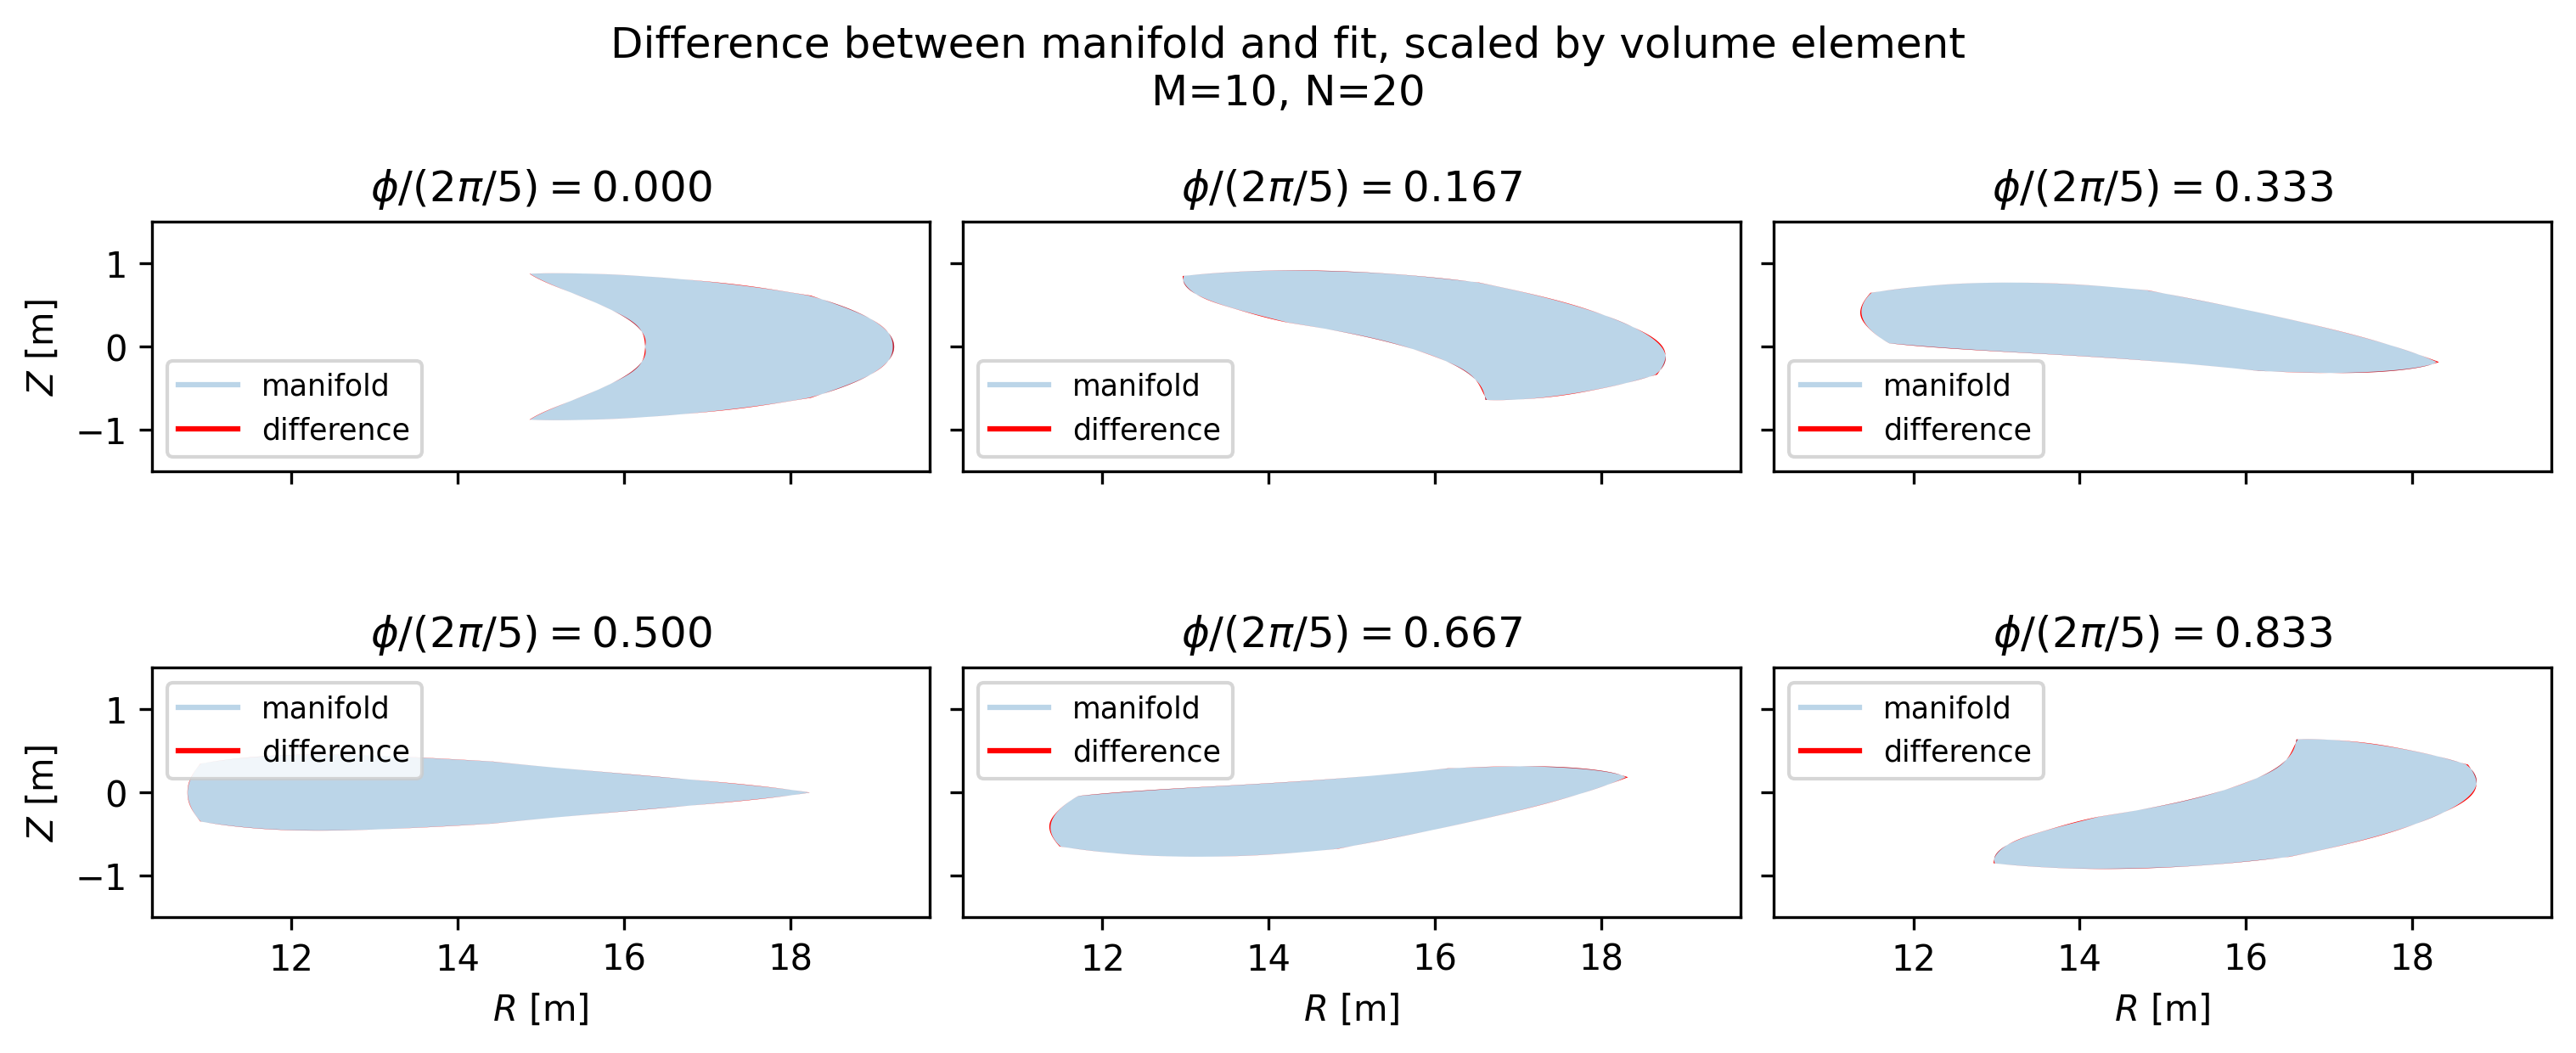

In [ ]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import mpmath
import numpy as np
import pandas as pd
from desc.basis import FourierZernikeBasis
from mpmath import hyp2f1
from shapely.geometry import Polygon

plt.rcParams['figure.dpi'] = 300

# returns ρ_tilde, θ_tilde as function of ρ, θ
def tilde(ρs, αs, Nsides):
    a = 2.0 / Nsides
    b = 1.0 / Nsides
    c = (Nsides + 1.0) / Nsides
    ρs, αs = map(lambda x: np.atleast_1d(np.asarray(x)), (ρs, αs))
    αs = αs - np.e ** (-(Nsides-3)/12) * np.sin(αs * Nsides) / Nsides
    ws = ρs * np.e ** (1j * αs)
    Ps = np.array([hyp2f1(a, b, c, w ** Nsides) * w for w in ws])
    P0s = np.array([hyp2f1(a, b, c, 1) for ρ in ρs])
    Phats = Ps / P0s
    ρ_tildes = np.array([float(mpmath.norm(Phat)) for Phat in Phats])
    α_tildes = np.array([float(mpmath.phase(Phat)) for Phat in Phats])
    α_tildes = np.where(α_tildes < 0, α_tildes + 2 * np.pi, α_tildes)
    return ρ_tildes, α_tildes

def open_json(filename):
    with open(filename, "r") as f:
        data = json.load(f)
    αs_data = np.array(data["alphas"])
    ζs_data = np.array(data["phis"])
    Rs_data = np.array(data["rs"])
    Zs_data = np.array(data["zs"])
    return αs_data, ζs_data, Rs_data, Zs_data

# load the data to perform the fitting to
filename = "./output/separatrix_fitting_linear_downsample_Mpts=300.json"
αs_data, ζs_data, Rs_data, Zs_data = open_json(filename)

# # calculate weights based on distance between data points
# Δr = np.zeros_like(Rs_data)
# for i in range(len(Rs_data)):
#     dists = np.sqrt((Rs_data - Rs_data[i])**2 + (Zs_data - Zs_data[i])**2)
#     dists = dists[dists != 0]
#     Δr[i] = np.min(dists)
# w_mat = np.diag((Δr)**0.5)
w_mat = np.diag(np.ones_like(Rs_data))

# calculate coefficients for the linear lstsq fit
L, M, N = 0, 10, 20
basis = FourierZernikeBasis(L, M, N)
modes = basis.modes
modes = modes[modes[:, 2] % 5 == 0] # only keep non-symmetry-breaking modes
ρs_tilde, αs_tilde = tilde(np.ones_like(αs_data), αs_data, 5)
ζs = ζs_data
θ_tilde = (αs_tilde + ζs) % (2 * np.pi)
nodes = np.array([ρs_tilde, θ_tilde, ζs]).T
f_ij_lmn = basis.evaluate(nodes, modes=modes) 
R_lmn, _, _, _ = np.linalg.lstsq(w_mat @ f_ij_lmn, w_mat @ Rs_data, rcond=None) 
Z_lmn, _, _, _ = np.linalg.lstsq(w_mat @ f_ij_lmn, w_mat @ Zs_data, rcond=None) 

# load the plotting data
filename = "./output/separatrix_plotting.json"
αs_data, ζs_data, Rs_data, Zs_data = open_json(filename)

# plot
n_plots = len(np.unique(ζs_data))
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, constrained_layout=True, figsize=(10, 6))
axes = np.hstack(axes)

nα = 1200
ncontours = 12
αs = np.array([2 * np.pi * k / nα for k in range(nα)])
for i in range(n_plots):
    ax = axes[i]
    ζ = np.unique(ζs_data)[i]

    ## setup plot
    ax.set_aspect('equal')
    ax.set_title(rf'$\phi / (2\pi/5) = {ζ*5/(2*np.pi):.3f}$')
    ax.set_xlabel(r'$R$ [m]')
    ax.set_ylabel(r'$Z$ [m]')
    ax.label_outer()
    ax.set_xlim(4.5, 6.5)
    ax.set_ylim(-1, 1)
    ax.plot([], [], color=(0.121, 0.467, 0.706, 0.3), label="manifold")
    ax.plot([], [], color='r', label="difference")
    loc = 'lower left' if i < 3 else 'upper left'
    ax.legend(loc=loc, fontsize='small')

    ## raw data
    idx = np.where(ζs_data == ζ)[0]
    Rs_data_2Dslice = Rs_data[idx]
    Zs_data_2Dslice = Zs_data[idx]
    αs_data_2Dslice = αs_data[idx]
    # sort the data by field line label
    df = pd.DataFrame({"α": αs_data_2Dslice, "R": Rs_data_2Dslice, "Z": Zs_data_2Dslice})
    df = df.sort_values("α")
    Rs_data_2Dslice = df["R"].values
    Zs_data_2Dslice = df["Z"].values
    αs_data_2Dslice = df["α"].values
    # scale the data by volume element
    pts_data = np.array([Rs_data_2Dslice, Zs_data_2Dslice]).T
    xsec_data = Polygon(pts_data)
    # the Polygon for the raw data is invalid so we remove self-intersections and
    # find the largest polygon from the resulting set
    xsec_data = max(xsec_data.buffer(0).geoms, key=lambda p: p.area)
    xsec_data_gpd = gpd.GeoSeries([xsec_data])

    ## fitted data
    nα = 1200
    αs = np.array([2 * np.pi * k / nα for k in range(nα)])
    ρs = np.ones_like(αs)
    ζs = np.ones_like(ρs) * ζ
    ρs_tilde, αs_tilde = tilde(ρs, αs, 5)
    θs_tilde = αs_tilde + ζ
    nodes = np.array([ρs_tilde, θs_tilde, ζs]).T
    basis_vecs = basis.evaluate(nodes, modes=modes)
    Rs_fit_2Dslice = basis_vecs @ R_lmn
    Zs_fit_2Dslice = basis_vecs @ Z_lmn
    # scale the data by volume element
    pts_fit = np.array([Rs_fit_2Dslice, Zs_fit_2Dslice]).T
    xsec_fit = Polygon(pts_fit)
    xsec_fit_gpd = gpd.GeoSeries([xsec_fit])

    ## difference
    polygon_dif_pos = xsec_data.difference(xsec_fit)
    polygon_dif_neg = xsec_fit.difference(xsec_data)
    polygon_dif = polygon_dif_pos.union(polygon_dif_neg)
    polygon_dif_gpd = gpd.GeoSeries([polygon_dif])

    ## plotting
    polygon_dif_gpd.plot(color='r', ax=ax)
    xsec_data_gpd.plot(color=(0.121, 0.467, 0.706, 0.3), ax=ax)

plt.suptitle(f"Difference between manifold and fit\nM={M}, N={N}")
plt.show()

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, constrained_layout=True, figsize=(10, 4))
axes = np.hstack(axes)

nα = 1200
ncontours = 12
αs = np.array([2 * np.pi * k / nα for k in range(nα)])
for i in range(n_plots):
    ax = axes[i]
    ζ = np.unique(ζs_data)[i]
    idx = np.where(ζs_data == ζ)

    ## setup plot
    ax.set_aspect('equal')
    ax.set_title(rf'$\phi / (2\pi/5) = {ζ*5/(2*np.pi):.3f}$')
    ax.set_xlabel(r'$R$ [m]')
    ax.set_ylabel(r'$Z$ [m]')
    ax.label_outer()
    ax.plot([], [], color=(0.121, 0.467, 0.706, 0.3), label="manifold")
    ax.plot([], [], color='r', label="difference")
    loc = 'lower left' if i < 3 else 'upper left'
    ax.legend(loc=loc, fontsize='small')
    # ax.set_xlim(4.5, 6.5)
    ax.set_ylim(-1.5, 1.5)

    ## raw data
    idx = np.where(ζs_data == ζ)[0]
    Rs_data_2Dslice = Rs_data[idx]
    Zs_data_2Dslice = Zs_data[idx]
    αs_data_2Dslice = αs_data[idx]
    # sort the data by field line label
    df = pd.DataFrame({"α": αs_data_2Dslice, "R": Rs_data_2Dslice, "Z": Zs_data_2Dslice})
    df = df.sort_values("α")
    Rs_data_2Dslice = df["R"].values
    Zs_data_2Dslice = df["Z"].values
    αs_data_2Dslice = df["α"].values
    # scale the data by volume element
    pts_data_scaled = np.array([Rs_data_2Dslice ** 2 / 2, Zs_data_2Dslice]).T
    xsec_data_scaled = Polygon(pts_data_scaled)
    # the Polygon for the raw data is invalid so we remove self-intersections and
    # find the largest polygon from the resulting set
    xsec_data_scaled = max(xsec_data_scaled.buffer(0).geoms, key=lambda p: p.area)
    xsec_data_scaled_gpd = gpd.GeoSeries([xsec_data_scaled])


    ## fitted data
    nα = 1200
    αs = np.array([2 * np.pi * k / nα for k in range(nα)])
    ρs = np.ones_like(αs)
    ζs = np.ones_like(ρs) * ζ
    ρs_tilde, αs_tilde = tilde(ρs, αs, 5)
    θs_tilde = αs_tilde + ζ
    nodes = np.array([ρs_tilde, θs_tilde, ζs]).T
    basis_vecs = basis.evaluate(nodes, modes=modes)
    Rs_fit_2Dslice = basis_vecs @ R_lmn
    Zs_fit_2Dslice = basis_vecs @ Z_lmn
    # scale the data by volume element
    pts_fit_scaled = np.array([Rs_fit_2Dslice ** 2 / 2, Zs_fit_2Dslice]).T
    xsec_fit_scaled = Polygon(pts_fit_scaled)
    xsec_fit_scaled_gpd = gpd.GeoSeries([xsec_fit_scaled])

    ## difference
    polygon_dif_pos = xsec_data_scaled.difference(xsec_fit_scaled)
    polygon_dif_neg = xsec_fit_scaled.difference(xsec_data_scaled)
    polygon_dif = polygon_dif_pos.union(polygon_dif_neg)
    polygon_dif_gpd = gpd.GeoSeries([polygon_dif])

    ## plotting
    polygon_dif_gpd.plot(color='r', ax=ax)
    xsec_data_scaled_gpd.plot(color=(0.121, 0.467, 0.706, 0.3), ax=ax)

plt.suptitle(f"Difference between manifold and fit, scaled by volume element\nM={M}, N={N}")
plt.show()

Now, let's try to determine the best downsampling method by examining convergence with respect to number of modes by methodology. First, let's create 2D color plots of volume error with respect to both the poloidal and toroidal mode numbers. The code below is commented out and the result plots pasted in for speed. 

In [ ]:
# import json
# import matplotlib.pyplot as plt
# import mpmath
# import numpy as np
# import pandas as pd
# from desc.basis import FourierZernikeBasis
# from mpmath import hyp2f1
# from shapely import make_valid
# from shapely.geometry import Polygon

# # returns ρ_tilde, θ_tilde as function of ρ, θ
# def tilde(ρs, αs, Nsides):
#     a = 2.0 / Nsides
#     b = 1.0 / Nsides
#     c = (Nsides + 1.0) / Nsides
#     ρs, αs = map(lambda x: np.atleast_1d(np.asarray(x)), (ρs, αs))
#     αs = αs - np.e ** (-(Nsides-3)/12) * np.sin(αs * Nsides) / Nsides
#     ws = ρs * np.e ** (1j * αs)
#     Ps = np.array([hyp2f1(a, b, c, w ** Nsides) * w for w in ws])
#     P0s = np.array([hyp2f1(a, b, c, 1) for ρ in ρs])
#     Phats = Ps / P0s
#     ρ_tildes = np.array([float(mpmath.norm(Phat)) for Phat in Phats])
#     α_tildes = np.array([float(mpmath.phase(Phat)) for Phat in Phats])
#     α_tildes = np.where(α_tildes < 0, α_tildes + 2 * np.pi, α_tildes)
#     return ρ_tildes, α_tildes

# def open_json(filename):
#     with open(filename, "r") as f:
#         data = json.load(f)
#     αs_data = np.array(data["alphas"])
#     ζs_data = np.array(data["phis"])
#     Rs_data = np.array(data["rs"])
#     Zs_data = np.array(data["zs"])
#     return αs_data, ζs_data, Rs_data, Zs_data

# # load the data to perform the fitting to
# filenames = ["linear_downsample_Mpts=20",
#           "linear_downsample_Mpts=100", 
#           "linear_downsample_Mpts=200", 
#           "linear_downsample_Mpts=300", 
#           "gauss_legendre_downsample_Mpts=100",
#           "gauss_legendre_downsample_Mpts=200",
#           "gauss_legendre_downsample_Mpts=300"]

# for filename in filenames:
#     αs_data, ζs_data, Rs_data, Zs_data = open_json("./output/separatrix_fitting_" + filename + ".json")

#     L = 0
#     num_Ms, num_Ns = 12, 3
#     ΔVs = np.empty((num_Ms, num_Ns))
#     for i, M in enumerate(range(1, num_Ms + 1)):
#         for j, N in enumerate(5 * np.array(range(num_Ns))):
#             # calculate coefficients for the linear lstsq fit
#             basis = FourierZernikeBasis(L, M, N)
#             modes = basis.modes[basis.modes[:, 2] % 5 == 0]
#             ρs_tilde, αs_tilde = tilde(np.ones_like(αs_data), αs_data, 5)
#             θ_tilde = (αs_tilde + ζs_data) % (2 * np.pi)
#             nodes = np.array([ρs_tilde, θ_tilde, ζs_data]).T
#             f_ij_lmn = basis.evaluate(nodes, modes=modes) 
#             R_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Rs_data, rcond=None) 
#             Z_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Zs_data, rcond=None) 

#             ζ_unique = np.unique(ζs_data)
#             Δζ = ζ_unique[1] - ζ_unique[0]
#             V_data, V_fit, V_diff = 0, 0, 0

#             for ζ in ζ_unique:
#                 ## volume of the raw data
#                 idx = np.where(ζs_data == ζ)[0]
#                 Rs_data_2Dslice = Rs_data[idx]
#                 Zs_data_2Dslice = Zs_data[idx]
#                 αs_data_2Dslice = αs_data[idx]
#                 # sort the data by field line label
#                 df = pd.DataFrame({"α": αs_data_2Dslice, "R": Rs_data_2Dslice, "Z": Zs_data_2Dslice})
#                 df = df.sort_values("α")
#                 Rs_data_2Dslice = df["R"].values
#                 Zs_data_2Dslice = df["Z"].values
#                 αs_data_2Dslice = df["α"].values
#                 # scale the data by volume element
#                 pts_data_scaled = np.array([Rs_data_2Dslice ** 2 / 2, Zs_data_2Dslice]).T
#                 xsec_data_scaled = Polygon(pts_data_scaled)
#                 # if the Polygon for the raw data is invalid we remove self-intersections and
#                 # find the largest polygon from the resulting set            

#                 if not xsec_data_scaled.is_valid:
#                     xsec_data_scaled = max(xsec_data_scaled.buffer(0).geoms, key=lambda p: p.area)
#                 V_data += xsec_data_scaled.area * Δζ

#                 ## volume of the fitted data
#                 nα = 300
#                 αs = np.array([2 * np.pi * k / nα for k in range(nα)])
#                 ρs = np.ones_like(αs)
#                 ζs = np.ones_like(ρs) * ζ
#                 ρs_tilde, αs_tilde = tilde(ρs, αs, 5)
#                 θs_tilde = αs_tilde + ζ
#                 nodes = np.array([ρs_tilde, θs_tilde, ζs]).T
#                 basis_vecs = basis.evaluate(nodes, modes=modes)
#                 Rs_fit_2Dslice = basis_vecs @ R_lmn
#                 Zs_fit_2Dslice = basis_vecs @ Z_lmn
#                 # scale the data by volume element
#                 pts_fit_scaled = np.array([Rs_fit_2Dslice ** 2 / 2, Zs_fit_2Dslice]).T
#                 xsec_fit_scaled = Polygon(pts_fit_scaled)
#                 if not xsec_fit_scaled.is_valid:
#                     xsec_fit_scaled = make_valid(xsec_fit_scaled)
#                 V_fit += xsec_fit_scaled.area * Δζ

#                 # volume of the difference
#                 polygon_dif_pos = xsec_data_scaled.difference(xsec_fit_scaled)
#                 polygon_dif_neg = xsec_fit_scaled.difference(xsec_data_scaled)
#                 polygon_dif = polygon_dif_pos.union(polygon_dif_neg)
#                 V_diff += polygon_dif.area * Δζ

#             ΔV = V_diff/V_data
#             ΔVs[i, j] = ΔV
#             print(f"M, N = {M}, {N}: ΔV={100*ΔV:.3f}%")

#     Ms = 0.5 + np.array(range(num_Ms + 1))
#     Ns = -2.5 + 5 * np.array(range(num_Ns + 1))

#     fig, ax = plt.subplots()
#     pcm = ax.pcolormesh(*np.meshgrid(Ms, Ns), ΔVs.T, cmap="viridis", vmin=0, vmax=1)
#     ax.set_xticks(Ms[:-1] + 0.5)
#     ax.set_yticks(Ns[:-1] + 2.5)
#     ax.set_xlabel('M')
#     ax.set_ylabel('N')
#     cbar = fig.colorbar(pcm, ax=ax, label='ΔV/V') 
#     plt.title("Symmetric difference volumetric error on \n" + filename)
#     plt.savefig("./output/convergence_" + filename + ".pdf")
#     plt.savefig("./output/convergence_" + filename + ".jpg")

<img src="./output/convergence_linear_downsample.jpg" align="center" width=500>
<img src="./output/convergence_gauss_legendre_downsample.jpg" align="center" width=500>

Let us do something similar but instead create a 1D plot showing convergence with respect to the poloidal mode number for $N=10$.

In [ ]:
# import json
# import matplotlib.pyplot as plt
# import mpmath
# import numpy as np
# import pandas as pd
# from desc.basis import FourierZernikeBasis
# from itertools import product
# from matplotlib.ticker import MaxNLocator
# from mpmath import hyp2f1
# from shapely import make_valid, symmetric_difference
# from shapely.geometry import Polygon

# # returns ρ_tilde, θ_tilde as function of ρ, θ
# def tilde(ρs, αs, Nsides):
#     a = 2.0 / Nsides
#     b = 1.0 / Nsides
#     c = (Nsides + 1.0) / Nsides
#     ρs, αs = map(lambda x: np.atleast_1d(np.asarray(x)), (ρs, αs))
#     αs = αs - np.e ** (-(Nsides-3)/12) * np.sin(αs * Nsides) / Nsides
#     ws = ρs * np.e ** (1j * αs)
#     Ps = np.array([hyp2f1(a, b, c, w ** Nsides) * w for w in ws])
#     P0s = np.array([hyp2f1(a, b, c, 1) for ρ in ρs])
#     Phats = Ps / P0s
#     ρ_tildes = np.array([float(mpmath.norm(Phat)) for Phat in Phats])
#     α_tildes = np.array([float(mpmath.phase(Phat)) for Phat in Phats])
#     α_tildes = np.where(α_tildes < 0, α_tildes + 2 * np.pi, α_tildes)
#     return ρ_tildes, α_tildes

# def open_json(filename):
#     with open(filename, "r") as f:
#         data = json.load(f)
#     αs_data = np.array(data["alphas"])
#     ζs_data = np.array(data["phis"])
#     Rs_data = np.array(data["rs"])
#     Zs_data = np.array(data["zs"])
#     return αs_data, ζs_data, Rs_data, Zs_data

# fig = plt.figure()
# ax = fig.gca()

# # load the data to perform the fitting to
# filenames = ["linear_downsample_Mpts=300", "gauss_legendre_downsample_Mpts=300"]
# labels = ["Linear", "Gauss-Legendre"]

# for filename, label in zip(filenames, labels):
#     print(label + ":")

#     fullname = "./output/separatrix_fitting_" + filename + ".json"
#     αs_data, ζs_data, Rs_data, Zs_data = open_json(fullname)

#     L = 0
#     num_Ms = 15
#     ΔVs = np.empty(num_Ms)
#     for N in [10, 15]:
#         for i, M in enumerate(range(1, num_Ms + 1)):
#             # calculate coefficients for the linear lstsq fit
#             basis = FourierZernikeBasis(L, M, N)
#             modes = basis.modes[basis.modes[:, 2] % 5 == 0]
#             ρs_tilde, αs_tilde = tilde(np.ones_like(αs_data), αs_data, 5)
#             θ_tilde = (αs_tilde + ζs_data) % (2 * np.pi)
#             nodes = np.array([ρs_tilde, θ_tilde, ζs_data]).T
#             f_ij_lmn = basis.evaluate(nodes, modes=modes) 
#             R_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Rs_data, rcond=None) 
#             Z_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Zs_data, rcond=None) 

#             ζ_unique = np.unique(ζs_data)
#             Δζ = ζ_unique[1] - ζ_unique[0]
#             V_data, V_fit, V_diff = 0, 0, 0

#             for ζ in ζ_unique:
#                 ## volume of the raw data
#                 idx = np.where(ζs_data == ζ)[0]
#                 Rs_data_2Dslice = Rs_data[idx]
#                 Zs_data_2Dslice = Zs_data[idx]
#                 αs_data_2Dslice = αs_data[idx]
#                 # sort the data by field line label
#                 df = pd.DataFrame({"α": αs_data_2Dslice, "R": Rs_data_2Dslice, "Z": Zs_data_2Dslice})
#                 df = df.sort_values("α")
#                 Rs_data_2Dslice = df["R"].values
#                 Zs_data_2Dslice = df["Z"].values
#                 αs_data_2Dslice = df["α"].values
#                 # scale the data by volume element
#                 pts_data_scaled = np.array([Rs_data_2Dslice ** 2 / 2, Zs_data_2Dslice]).T
#                 xsec_data_scaled = Polygon(pts_data_scaled)
#                 # if the Polygon for the raw data is invalid we remove self-intersections and
#                 # find the largest polygon from the resulting set            

#                 if not xsec_data_scaled.is_valid:
#                     xsec_data_scaled = max(xsec_data_scaled.buffer(0).geoms, key=lambda p: p.area)
#                 V_data += xsec_data_scaled.area * Δζ

#                 ## volume of the fitted data
#                 nα = 300
#                 αs = np.array([2 * np.pi * k / nα for k in range(nα)])
#                 ρs = np.ones_like(αs)
#                 ζs = np.ones_like(ρs) * ζ
#                 ρs_tilde, αs_tilde = tilde(ρs, αs, 5)
#                 θs_tilde = αs_tilde + ζ
#                 nodes = np.array([ρs_tilde, θs_tilde, ζs]).T
#                 basis_vecs = basis.evaluate(nodes, modes=modes)
#                 Rs_fit_2Dslice = basis_vecs @ R_lmn
#                 Zs_fit_2Dslice = basis_vecs @ Z_lmn
#                 # scale the data by volume element
#                 pts_fit_scaled = np.array([Rs_fit_2Dslice ** 2 / 2, Zs_fit_2Dslice]).T
#                 xsec_fit_scaled = Polygon(pts_fit_scaled)
#                 if not xsec_fit_scaled.is_valid:
#                     xsec_fit_scaled = make_valid(xsec_fit_scaled)
#                 V_fit += xsec_fit_scaled.area * Δζ

#                 # volume of the difference
#                 polygon_dif = symmetric_difference(xsec_data_scaled, xsec_fit_scaled)
#                 V_diff += polygon_dif.area * Δζ

#             ΔV = V_diff/V_data
#             ΔVs[i] = ΔV
#             print(f"M, N = {M}, {N}: ΔV={100*ΔV:.3f}%")
        
#         plt.plot(range(1, num_Ms + 1), ΔVs, label=label + f", N={N}")
#         plt.scatter(range(1, num_Ms + 1), ΔVs)

# plt.legend()
# plt.xlabel("M")
# plt.ylabel("ΔV/V")
# plt.ylim(0, 1)
# plt.title("Symmetric difference volume error by M with N=10\n for different downsampling methods")
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.savefig("./output/convergence_M_by_downsample.pdf")
# plt.savefig("./output/convergence_M_by_downsample.jpg")
# plt.show()

<img src="./output/convergence_M_by_downsample.jpg" align="center" width=500>
<img src="./output/zoomed.jpg" align="center" width=500>


The conclusion we can therefore make is that linear downsampling appears to perform mildly better than Gauss-Legendre for a linear least squares regression. 

Now, let's go ahead and examine the convergence with respect to mode number and presence of an intermediate mapping step. 

DESC version 0.13.0,using JAX backend, jax version=0.4.38, jaxlib version=0.4.38, dtype=float64
Using device: CPU, with 13.91 GB available memory
no intermediate mapping:
M, N = 1, 20: ΔV=29.061%
M, N = 2, 20: ΔV=8.545%
M, N = 3, 20: ΔV=7.055%
M, N = 4, 20: ΔV=3.953%
M, N = 5, 20: ΔV=2.483%
M, N = 6, 20: ΔV=2.033%
M, N = 7, 20: ΔV=1.523%
M, N = 8, 20: ΔV=1.629%
M, N = 9, 20: ΔV=1.169%
M, N = 10, 20: ΔV=1.011%
M, N = 11, 20: ΔV=0.963%
M, N = 12, 20: ΔV=0.868%
M, N = 13, 20: ΔV=0.903%
M, N = 14, 20: ΔV=0.778%
M, N = 15, 20: ΔV=0.742%
M, N = 1, 30: ΔV=29.060%
M, N = 2, 30: ΔV=8.528%
M, N = 3, 30: ΔV=7.053%
M, N = 4, 30: ΔV=3.934%
M, N = 5, 30: ΔV=2.453%
M, N = 6, 30: ΔV=1.985%
M, N = 7, 30: ΔV=1.440%
M, N = 8, 30: ΔV=1.561%
M, N = 9, 30: ΔV=1.038%
M, N = 10, 30: ΔV=0.877%
M, N = 11, 30: ΔV=0.836%
M, N = 12, 30: ΔV=0.725%
M, N = 13, 30: ΔV=0.770%
M, N = 14, 30: ΔV=0.600%
M, N = 15, 30: ΔV=0.559%
M, N = 1, 40: ΔV=29.059%
M, N = 2, 40: ΔV=8.523%
M, N = 3, 40: ΔV=7.046%
M, N = 4, 40: ΔV=3.922

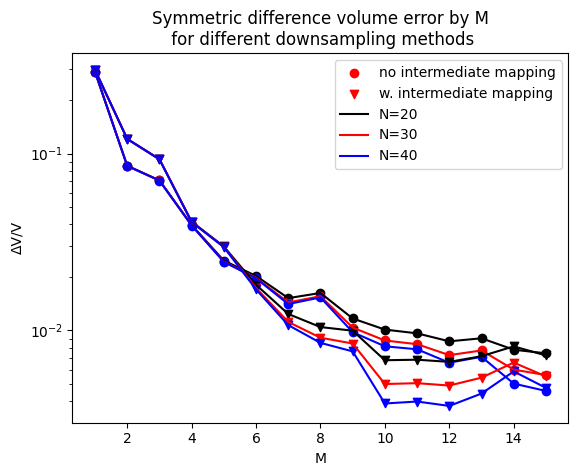

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from desc.basis import FourierZernikeBasis
from matplotlib.ticker import MaxNLocator
from scipy.special import hyp2f1
from shapely import make_valid, symmetric_difference
from shapely.geometry import Polygon

# returns ρ_tilde, θ_tilde as function of ρ, θ
def tilde(ρs, αs, Nsides):
    a = 2.0 / Nsides
    b = 1.0 / Nsides
    c = (Nsides + 1.0) / Nsides
    ρs, αs = map(lambda x: np.atleast_1d(np.asarray(x)), (ρs, αs))
    αs = αs - np.e ** (-(Nsides-3)/12) * np.sin(αs * Nsides) / Nsides
    ws = ρs * np.e ** (1j * αs)
    Ps = np.array([hyp2f1(a, b, c, w ** Nsides) * w for w in ws])
    P0s = np.array([hyp2f1(a, b, c, 1) for ρ in ρs])
    Phats = Ps / P0s
    ρ_tildes = np.abs(Phats)
    α_tildes = np.angle(Phats)
    α_tildes = np.where(α_tildes < 0, α_tildes + 2 * np.pi, α_tildes)
    return ρ_tildes, α_tildes

def open_json(filename):
    
    with open(filename, "r") as f:
        data = json.load(f)
    αs_data = np.array(data["alphas"])
    ζs_data = np.array(data["phis"])
    Rs_data = np.array(data["rs"])
    Zs_data = np.array(data["zs"])
    return αs_data, ζs_data, Rs_data, Zs_data

fig = plt.figure()
ax = fig.gca()

# load the data to perform the fitting to
filename = "./output/separatrix_fitting_linear_downsample_Mpts=300.json"
αs_data, ζs_data, Rs_data, Zs_data = open_json(filename)

L, Ns = 0, [20, 30, 40]
num_Ms = 15
colors = ['k', 'r', 'b']

### fitting without the intermediate polygonal mapping
label = "no intermediate mapping"
print(label + ":")

ΔVs = np.empty(num_Ms)
for N, color in zip(Ns, colors):
    for i, M in enumerate(range(1, num_Ms + 1)):
        # calculate coefficients for the linear lstsq fit
        basis = FourierZernikeBasis(L, M, N)
        modes = basis.modes[basis.modes[:, 2] % 5 == 0]

        ρs_data = np.ones_like(αs_data)
        θs_data = (αs_data + ζs_data) % (2 * np.pi)

        nodes = np.array([ρs_data, θs_data, ζs_data]).T
        f_ij_lmn = basis.evaluate(nodes, modes=modes) 
        R_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Rs_data, rcond=None) 
        Z_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Zs_data, rcond=None) 

        ζ_unique = np.unique(ζs_data)
        Δζ = ζ_unique[1] - ζ_unique[0]
        V_data, V_fit, V_diff = 0, 0, 0

        for ζ in ζ_unique:
            ## volume of the raw data
            idx = np.where(ζs_data == ζ)[0]
            Rs_data_2Dslice = Rs_data[idx]
            Zs_data_2Dslice = Zs_data[idx]
            αs_data_2Dslice = αs_data[idx]
            # sort the data by field line label
            df = pd.DataFrame({"α": αs_data_2Dslice, "R": Rs_data_2Dslice, "Z": Zs_data_2Dslice})
            df = df.sort_values("α")
            Rs_data_2Dslice = df["R"].values
            Zs_data_2Dslice = df["Z"].values
            αs_data_2Dslice = df["α"].values
            # scale the data by volume element
            pts_data_scaled = np.array([Rs_data_2Dslice ** 2 / 2, Zs_data_2Dslice]).T
            xsec_data_scaled = Polygon(pts_data_scaled)
            # if the Polygon for the raw data is invalid we remove self-intersections and
            # find the largest polygon from the resulting set            

            if not xsec_data_scaled.is_valid:
                xsec_data_scaled = max(xsec_data_scaled.buffer(0).geoms, key=lambda p: p.area)
            V_data += xsec_data_scaled.area * Δζ

            ## volume of the fitted data
            nα = 300
            αs = np.array([2 * np.pi * k / nα for k in range(nα)])
            ρs = np.ones_like(αs)
            ζs = np.ones_like(ρs) * ζ
            θs = αs + ζs

            nodes = np.array([ρs, θs, ζs]).T
            basis_vecs = basis.evaluate(nodes, modes=modes)
            Rs_fit_2Dslice = basis_vecs @ R_lmn
            Zs_fit_2Dslice = basis_vecs @ Z_lmn
            # scale the data by volume element
            pts_fit_scaled = np.array([Rs_fit_2Dslice ** 2 / 2, Zs_fit_2Dslice]).T
            xsec_fit_scaled = Polygon(pts_fit_scaled)
            if not xsec_fit_scaled.is_valid:
                xsec_fit_scaled = make_valid(xsec_fit_scaled)
            V_fit += xsec_fit_scaled.area * Δζ

            # volume of the difference
            polygon_dif = symmetric_difference(xsec_data_scaled, xsec_fit_scaled)
            V_diff += polygon_dif.area * Δζ

        ΔV = V_diff/V_data
        ΔVs[i] = ΔV
        print(f"M, N = {M}, {N}: ΔV={100*ΔV:.3f}%")

    plt.plot(range(1, num_Ms + 1), ΔVs, c=color)
    plt.scatter(range(1, num_Ms + 1), ΔVs, c=color)

### fitting with intermediate map
label = "w. intermediate mapping"
print(label + ":")

ΔVs = np.empty(num_Ms)
for N, color in zip(Ns, colors):
    for i, M in enumerate(range(1, num_Ms + 1)):
        # calculate coefficients for the linear lstsq fit
        basis = FourierZernikeBasis(L, M, N)
        modes = basis.modes[basis.modes[:, 2] % 5 == 0]
        ρs_tilde, αs_tilde = tilde(np.ones_like(αs_data), αs_data, 5)
        θ_tilde = (αs_tilde + ζs_data) % (2 * np.pi)
        nodes = np.array([ρs_tilde, θ_tilde, ζs_data]).T
        f_ij_lmn = basis.evaluate(nodes, modes=modes) 
        R_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Rs_data, rcond=-1) 
        Z_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Zs_data, rcond=-1) 

        ζ_unique = np.unique(ζs_data)
        Δζ = ζ_unique[1] - ζ_unique[0]
        V_data, V_fit, V_diff = 0, 0, 0

        for ζ in ζ_unique:
            ## volume of the raw data
            idx = np.where(ζs_data == ζ)[0]
            Rs_data_2Dslice = Rs_data[idx]
            Zs_data_2Dslice = Zs_data[idx]
            αs_data_2Dslice = αs_data[idx]
            # sort the data by field line label
            df = pd.DataFrame({"α": αs_data_2Dslice, "R": Rs_data_2Dslice, "Z": Zs_data_2Dslice})
            df = df.sort_values("α")
            Rs_data_2Dslice = df["R"].values
            Zs_data_2Dslice = df["Z"].values
            αs_data_2Dslice = df["α"].values
            # scale the data by volume element

            pts_data_scaled = np.array([Rs_data_2Dslice ** 2 / 2, Zs_data_2Dslice]).T
            xsec_data_scaled = Polygon(pts_data_scaled)
            # if the Polygon for the raw data is invalid we remove self-intersections and
            # find the largest polygon from the resulting set            

            if not xsec_data_scaled.is_valid:
                xsec_data_scaled = max(xsec_data_scaled.buffer(0).geoms, key=lambda p: p.area)
            V_data += xsec_data_scaled.area * Δζ

            ## volume of the fitted data
            nα = 1200
            αs = np.array([2 * np.pi * k / nα for k in range(nα)])
            ρs = np.ones_like(αs)
            ζs = np.ones_like(ρs) * ζ
            ρs_tilde, αs_tilde = tilde(ρs, αs, 5)
            θs_tilde = αs_tilde + ζ
            nodes = np.array([ρs_tilde, θs_tilde, ζs]).T
            basis_vecs = basis.evaluate(nodes, modes=modes)
            Rs_fit_2Dslice = basis_vecs @ R_lmn
            Zs_fit_2Dslice = basis_vecs @ Z_lmn
            # scale the data by volume element
            pts_fit_scaled = np.array([Rs_fit_2Dslice ** 2 / 2, Zs_fit_2Dslice]).T
            xsec_fit_scaled = Polygon(pts_fit_scaled)
            if not xsec_fit_scaled.is_valid:
                xsec_fit_scaled = make_valid(xsec_fit_scaled)
            V_fit += xsec_fit_scaled.area * Δζ
            # volume of the difference
            polygon_dif = symmetric_difference(xsec_data_scaled, xsec_fit_scaled)
            V_diff += polygon_dif.area * Δζ

        ΔV = V_diff/V_data
        ΔVs[i] = ΔV
        print(f"M, N = {M}, {N}: ΔV={100*ΔV:.3f}%")

    plt.plot(range(1, num_Ms + 1), ΔVs, c=color)
    plt.scatter(range(1, num_Ms + 1), ΔVs, c=color, marker="v")

plt.scatter([], [], label="no intermediate mapping", c="r")
plt.scatter([], [], label="w. intermediate mapping", c="r", marker="v")

for N, color in zip(Ns, colors):
    plt.plot([], [], label=f"N={N}", c=color)

plt.legend()
plt.xlabel("M")
plt.ylabel("ΔV/V")
plt.gca().set_yscale('log')
plt.title("Symmetric difference volume error by M\n for different downsampling methods")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("./output/convergence_by_downsample.pdf")
plt.savefig("./output/convergence_by_downsample.jpg")
plt.show()

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from desc.basis import FourierZernikeBasis
from matplotlib.ticker import MaxNLocator
from scipy.special import hyp2f1
from shapely import make_valid, symmetric_difference
from shapely.geometry import Polygon

# returns ρ_tilde, θ_tilde as function of ρ, θ
def tilde(ρs, αs, Nsides):
    a = 2.0 / Nsides
    b = 1.0 / Nsides
    c = (Nsides + 1.0) / Nsides
    ρs, αs = map(lambda x: np.atleast_1d(np.asarray(x)), (ρs, αs))
    αs = αs - np.e ** (-(Nsides-3)/12) * np.sin(αs * Nsides) / Nsides
    ws = ρs * np.e ** (1j * αs)
    Ps = np.array([hyp2f1(a, b, c, w ** Nsides) * w for w in ws])
    P0s = np.array([hyp2f1(a, b, c, 1) for ρ in ρs])
    Phats = Ps / P0s
    ρ_tildes = np.abs(Phats)
    α_tildes = np.angle(Phats)
    α_tildes = np.where(α_tildes < 0, α_tildes + 2 * np.pi, α_tildes)
    return ρ_tildes, α_tildes

def open_json(filename):
    with open(filename, "r") as f:
        data = json.load(f)
    αs_data = np.array(data["alphas"])
    ζs_data = np.array(data["phis"])
    Rs_data = np.array(data["rs"])
    Zs_data = np.array(data["zs"])
    return αs_data, ζs_data, Rs_data, Zs_data

fig = plt.figure()
ax = fig.gca()

# load the data to perform the fitting to
filename = "./output/separatrix_hitorres_fitting_linear_downsample_Mpts=300.json"
αs_data, ζs_data, Rs_data, Zs_data = open_json(filename)

L, Ns = 0, [20, 30, 40]
num_Ms = 15
colors = ['k', 'r', 'b']

### fitting without the intermediate polygonal mapping
label = "no intermediate mapping"
print(label + ":")

ΔVs = np.empty(num_Ms)
for N, color in zip(Ns, colors):
    for i, M in enumerate(range(1, num_Ms + 1)):
        # calculate coefficients for the linear lstsq fit
        basis = FourierZernikeBasis(L, M, N)
        modes = basis.modes[basis.modes[:, 2] % 5 == 0]

        ρs_data = np.ones_like(αs_data)
        θs_data = (αs_data + ζs_data) % (2 * np.pi)

        nodes = np.array([ρs_data, θs_data, ζs_data]).T
        f_ij_lmn = basis.evaluate(nodes, modes=modes) 
        R_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Rs_data, rcond=None) 
        Z_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Zs_data, rcond=None) 

        ζ_unique = np.unique(ζs_data)
        Δζ = ζ_unique[1] - ζ_unique[0]
        V_data, V_fit, V_diff = 0, 0, 0

        for ζ in ζ_unique:
            ## volume of the raw data
            idx = np.where(ζs_data == ζ)[0]
            Rs_data_2Dslice = Rs_data[idx]
            Zs_data_2Dslice = Zs_data[idx]
            αs_data_2Dslice = αs_data[idx]
            # sort the data by field line label
            df = pd.DataFrame({"α": αs_data_2Dslice, "R": Rs_data_2Dslice, "Z": Zs_data_2Dslice})
            df = df.sort_values("α")
            Rs_data_2Dslice = df["R"].values
            Zs_data_2Dslice = df["Z"].values
            αs_data_2Dslice = df["α"].values
            # scale the data by volume element
            pts_data_scaled = np.array([Rs_data_2Dslice ** 2 / 2, Zs_data_2Dslice]).T
            xsec_data_scaled = Polygon(pts_data_scaled)
            # if the Polygon for the raw data is invalid we remove self-intersections and
            # find the largest polygon from the resulting set            

            if not xsec_data_scaled.is_valid:
                xsec_data_scaled = max(xsec_data_scaled.buffer(0).geoms, key=lambda p: p.area)
            V_data += xsec_data_scaled.area * Δζ

            ## volume of the fitted data
            nα = 300
            αs = np.array([2 * np.pi * k / nα for k in range(nα)])
            ρs = np.ones_like(αs)
            ζs = np.ones_like(ρs) * ζ
            θs = αs + ζs

            nodes = np.array([ρs, θs, ζs]).T
            basis_vecs = basis.evaluate(nodes, modes=modes)
            Rs_fit_2Dslice = basis_vecs @ R_lmn
            Zs_fit_2Dslice = basis_vecs @ Z_lmn
            # scale the data by volume element
            pts_fit_scaled = np.array([Rs_fit_2Dslice ** 2 / 2, Zs_fit_2Dslice]).T
            xsec_fit_scaled = Polygon(pts_fit_scaled)
            if not xsec_fit_scaled.is_valid:
                xsec_fit_scaled = make_valid(xsec_fit_scaled)
            V_fit += xsec_fit_scaled.area * Δζ

            # volume of the difference
            polygon_dif = symmetric_difference(xsec_data_scaled, xsec_fit_scaled)
            V_diff += polygon_dif.area * Δζ

        ΔV = V_diff/V_data
        ΔVs[i] = ΔV
        print(f"M, N = {M}, {N}: ΔV={100*ΔV:.3f}%")

    plt.plot(range(1, num_Ms + 1), ΔVs, c=color)
    plt.scatter(range(1, num_Ms + 1), ΔVs, c=color)

### fitting with intermediate map
label = "w. intermediate mapping"
print(label + ":")

ΔVs = np.empty(num_Ms)
for N, color in zip(Ns, colors):
    for i, M in enumerate(range(1, num_Ms + 1)):
        # calculate coefficients for the linear lstsq fit
        basis = FourierZernikeBasis(L, M, N)
        modes = basis.modes[basis.modes[:, 2] % 5 == 0]
        ρs_tilde, αs_tilde = tilde(np.ones_like(αs_data), αs_data, 5)
        θ_tilde = (αs_tilde + ζs_data) % (2 * np.pi)
        nodes = np.array([ρs_tilde, θ_tilde, ζs_data]).T
        f_ij_lmn = basis.evaluate(nodes, modes=modes) 
        R_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Rs_data, rcond=-1) 
        Z_lmn, _, _, _ = np.linalg.lstsq(f_ij_lmn, Zs_data, rcond=-1) 

        ζ_unique = np.unique(ζs_data)
        Δζ = ζ_unique[1] - ζ_unique[0]
        V_data, V_fit, V_diff = 0, 0, 0

        for ζ in ζ_unique:
            ## volume of the raw data
            idx = np.where(ζs_data == ζ)[0]
            Rs_data_2Dslice = Rs_data[idx]
            Zs_data_2Dslice = Zs_data[idx]
            αs_data_2Dslice = αs_data[idx]
            # sort the data by field line label
            df = pd.DataFrame({"α": αs_data_2Dslice, "R": Rs_data_2Dslice, "Z": Zs_data_2Dslice})
            df = df.sort_values("α")
            Rs_data_2Dslice = df["R"].values
            Zs_data_2Dslice = df["Z"].values
            αs_data_2Dslice = df["α"].values
            # scale the data by volume element

            pts_data_scaled = np.array([Rs_data_2Dslice ** 2 / 2, Zs_data_2Dslice]).T
            xsec_data_scaled = Polygon(pts_data_scaled)
            # if the Polygon for the raw data is invalid we remove self-intersections and
            # find the largest polygon from the resulting set            

            if not xsec_data_scaled.is_valid:
                xsec_data_scaled = max(xsec_data_scaled.buffer(0).geoms, key=lambda p: p.area)
            V_data += xsec_data_scaled.area * Δζ

            ## volume of the fitted data
            nα = 1200
            αs = np.array([2 * np.pi * k / nα for k in range(nα)])
            ρs = np.ones_like(αs)
            ζs = np.ones_like(ρs) * ζ
            ρs_tilde, αs_tilde = tilde(ρs, αs, 5)
            θs_tilde = αs_tilde + ζ
            nodes = np.array([ρs_tilde, θs_tilde, ζs]).T
            basis_vecs = basis.evaluate(nodes, modes=modes)
            Rs_fit_2Dslice = basis_vecs @ R_lmn
            Zs_fit_2Dslice = basis_vecs @ Z_lmn
            # scale the data by volume element
            pts_fit_scaled = np.array([Rs_fit_2Dslice ** 2 / 2, Zs_fit_2Dslice]).T
            xsec_fit_scaled = Polygon(pts_fit_scaled)
            if not xsec_fit_scaled.is_valid:
                xsec_fit_scaled = make_valid(xsec_fit_scaled)
            V_fit += xsec_fit_scaled.area * Δζ
            # volume of the difference
            polygon_dif = symmetric_difference(xsec_data_scaled, xsec_fit_scaled)
            V_diff += polygon_dif.area * Δζ

        ΔV = V_diff/V_data
        ΔVs[i] = ΔV
        print(f"M, N = {M}, {N}: ΔV={100*ΔV:.3f}%")

    plt.plot(range(1, num_Ms + 1), ΔVs, c=color)
    plt.scatter(range(1, num_Ms + 1), ΔVs, c=color, marker="v")

plt.scatter([], [], label="no intermediate mapping", c="r")
plt.scatter([], [], label="w. intermediate mapping", c="r", marker="v")

for N, color in zip(Ns, colors):
    plt.plot([], [], label=f"N={N}", c=color)

plt.legend()
plt.xlabel("M")
plt.ylabel("ΔV/V")
plt.gca().set_yscale('log')
plt.title("Symmetric difference volume error by M\n for different downsampling methods")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("./output/convergence_by_downsample.pdf")
plt.savefig("./output/convergence_by_downsample.jpg")
plt.show()